<a href="https://colab.research.google.com/github/prachi1326/Covid-19-vaccination-Analysis/blob/main/AML_2404_AI_%26_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [ ]:
!pip3 install statsmodels
!pip3 install git+https://github.com/statsmodels/statsmodels.git


  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-rbgjj7kj
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-rbgjj7kj
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [ ]:
!pip install pmdarima

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import drive,files
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log


#38004110

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 13.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Loading the datasets into a Dataframe

In [ ]:
drive.mount('/content/drive', force_remount = True)
dataFrame = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-map.csv")
dataFrame.head()


Mounted at /content/drive


,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame2 = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-byVaccineType.csv")
dataFrame2.head()

,pruid,prename,prfname,week_end,product_name,numtotal_atleast1dose,numtotal_partially,numtotal_fully,prop_atleast1dose,prop_partially,prop_fully,Unnamed: 11,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_partially,propweekdelta_fully
0,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-12-19,Unknown,2.0,2,0.0,<0.01,<0.01,0.00,NaN,NaN,NaN,NaN,NaN
3,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-12-19,Pfizer-BioNTech,972.0,972,0.0,0.19,0.19,0.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame3 = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-byAgeAndSex.csv")
dataFrame3.head()

In [ ]:
print(dataFrame.shape)
print(dataFrame2.shape)
print(dataFrame3.shape)

(553, 20)
(3421, 16)
(26082, 20)


In [ ]:
mergedf = pd.merge(dataFrame2, dataFrame3, on = ["week_end", "prename"], how = "outer")

In [ ]:
mergedf.head()

,pruid_x,prename,prfname_x,week_end,product_name,numtotal_atleast1dose_x,numtotal_partially_x,numtotal_fully_x,prop_atleast1dose_x,prop_partially_x,prop_fully_x,Unnamed: 11,numweekdelta_atleast1dose_x,numweekdelta_fully_x,propweekdelta_partially_x,propweekdelta_fully_x,pruid_y,prfname_y,sex,age,numtotal_atleast1dose_y,numtotal_partially_y,numtotal_fully_y,prop_atleast1dose_y,prop_partially_y,prop_fully_y,numweekdelta_atleast1dose_y,numweekdelta_fully_y,propweekdelta_partially_y,propweekdelta_fully_y,numtotal_partiallyrange,numtotal_fullyrange,prop_partiallyrange,prop_fullyrange
0,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,0-15,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,16-69,8602,8602,0,0.14,0.14,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,70-74,94,94,0,0.02,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,75-79,47,47,0,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,80+,241,241,0,0.05,0.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mergedf.shape

(173116, 34)

In [ ]:
df = dataFrame2[(dataFrame2["prename"] == "Canada") & (dataFrame2["week_end"]=="2020-12-19")]
df

,pruid,prename,prfname,week_end,product_name,numtotal_atleast1dose,numtotal_partially,numtotal_fully,prop_atleast1dose,prop_partially,prop_fully,Unnamed: 11,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_partially,propweekdelta_fully
0,1,Canada,Canada,2020-12-19,Not reported,0.0,0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-12-19,Unknown,2.0,2,0.0,<0.01,<0.01,0.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = dataFrame3[(dataFrame3["prename"] == "Canada") & (dataFrame3["week_end"]=="2020-12-19")]
df2.head()

In [ ]:
mergedf = pd.merge(df, df2, on = ["week_end", "prename"], how = "outer")
mergedf.iloc[32:65]

,pruid_x,prename,prfname_x,week_end,product_name,numtotal_atleast1dose_x,numtotal_partially_x,numtotal_fully_x,prop_atleast1dose_x,prop_partially_x,prop_fully_x,Unnamed: 11,numweekdelta_atleast1dose_x,numweekdelta_fully_x,propweekdelta_partially_x,propweekdelta_fully_x,pruid_y,prfname_y,sex,age,numtotal_atleast1dose_y,numtotal_partially_y,numtotal_fully_y,prop_atleast1dose_y,prop_partially_y,prop_fully_y,numweekdelta_atleast1dose_y,numweekdelta_fully_y,propweekdelta_partially_y,propweekdelta_fully_y,numtotal_partiallyrange,numtotal_fullyrange,prop_partiallyrange,prop_fullyrange
32,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,0-15,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,16-69,8602,8602,0,0.14,0.14,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,70-74,94,94,0,0.02,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,75-79,47,47,0,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,80+,241,241,0,0.05,0.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,All ages,8984,8984,0,0.10,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,Not reported,0,0,0,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,f,Unknown,0,0,0,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,m,0-15,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,1,Canada,Canada,2020-12-19,Pfizer-BioNTech,12360.0,12360,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,1,Canada,m,16-69,3158,3158,0,0.05,0.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mergedf.to_csv('merge.csv')
files.download('merge.csv')

In [ ]:
mergedf2 = pd.merge(dataFrame2, dataFrame3, on = ["week_end", "prename"], how = "outer")

In [ ]:
mergedf2.to_csv('merge2.csv')
files.download('merge2.csv')

## dataFrame EDA

In [ ]:
dataFrame.shape

(553, 20)

In [ ]:
dataFrame.size

11060

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week_end                    553 non-null    object 
 1   pruid                       553 non-null    int64  
 2   prename                     553 non-null    object 
 3   prfname                     553 non-null    object 
 4   numtotal_atleast1dose       553 non-null    int64  
 5   numtotal_partially          544 non-null    float64
 6   numtotal_fully              539 non-null    float64
 7   proptotal_atleast1dose      553 non-null    float64
 8   proptotal_partially         544 non-null    float64
 9   proptotal_fully             539 non-null    float64
 10  numeligible_atleast1dose    224 non-null    float64
 11  numeligible_partially       215 non-null    float64
 12  numeligible_fully           224 non-null    float64
 13  propeligible_atleast1dose   224 non

In [ ]:
dataFrame.describe()

,pruid,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
count,553.000000,5.530000e+02,5.440000e+02,5.390000e+02,553.000000,544.000000,539.000000,2.240000e+02,2.150000e+02,2.240000e+02,224.000000,215.000000,224.000000,0.0,0.0,0.0,0.0
mean,34.987342,2.036947e+06,9.203167e+05,1.152642e+06,38.989042,14.784761,24.268330,3.785068e+06,1.180799e+06,2.631832e+06,79.714330,20.839302,57.557723,NaN,NaN,NaN,NaN
std,21.703324,5.043405e+06,2.542803e+06,3.683698e+06,29.268768,15.502421,26.594935,6.943712e+06,2.875822e+06,5.365442e+06,6.389436,18.814785,23.131711,NaN,NaN,NaN,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.779800e+04,1.537000e+03,1.439700e+04,60.990000,4.240000,3.090000,NaN,NaN,NaN,NaN
25%,12.000000,2.427200e+04,5.697500e+03,1.055650e+04,5.010000,3.117500,1.675000,1.240490e+05,3.029000e+04,4.508025e+04,75.150000,7.655000,44.612500,NaN,NaN,NaN,NaN
50%,46.000000,1.935840e+05,7.985250e+04,3.686200e+04,43.240000,8.050000,7.010000,7.398540e+05,1.571720e+05,5.273370e+05,80.240000,10.590000,67.165000,NaN,NaN,NaN,NaN
75%,59.000000,9.588990e+05,5.100578e+05,4.874960e+05,66.690000,21.915000,52.730000,3.721856e+06,7.959625e+05,2.534679e+06,84.610000,29.790000,74.875000,NaN,NaN,NaN,NaN
max,62.000000,2.859809e+07,1.996076e+07,2.649263e+07,81.680000,61.740000,74.870000,2.849091e+07,1.993665e+07,2.643460e+07,92.730000,69.410000,85.620000,NaN,NaN,NaN,NaN


In [ ]:
print(dataFrame.isnull().sum())

week_end                        0
pruid                           0
prename                         0
prfname                         0
numtotal_atleast1dose           0
numtotal_partially              9
numtotal_fully                 14
proptotal_atleast1dose          0
proptotal_partially             9
proptotal_fully                14
numeligible_atleast1dose      329
numeligible_partially         338
numeligible_fully             329
propeligible_atleast1dose     329
propeligible_partially        338
propeligible_fully            329
numweekdelta_atleast1dose     553
numweekdelta_fully            553
propweekdelta_atleast1dose    553
propweekdelta_fully           553
dtype: int64


In [ ]:
print(dataFrame['prename'].unique())

['Canada' 'Newfoundland and Labrador' 'Nova Scotia' 'Quebec' 'Manitoba'
 'Saskatchewan' 'British Columbia' 'Yukon' 'Northwest Territories'
 'Nunavut' 'Prince Edward Island' 'New Brunswick' 'Alberta' 'Ontario']


In [ ]:
print(dataFrame['prfname'].unique())

['Canada' 'Terre-Neuve-et-Labrador' 'Nouvelle-Écosse' 'Québec' 'Manitoba'
 'Saskatchewan' 'Colombie-Britannique' 'Yukon' 'Territoires du Nord-Ouest'
 'Nunavut' 'Île-du-Prince-Édouard' 'Nouveau-Brunswick' 'Alberta' 'Ontario']


In [ ]:
dataFrame.head()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame.tail()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
548,2021-09-18,48,Alberta,Alberta,3062771,323925.0,2738846.0,69.26,7.33,61.94,2999263.0,297887.0,2701376.0,79.74,7.92,71.82,NaN,NaN,NaN,NaN
549,2021-09-18,59,British Columbia,Colombie-Britannique,4007201,338775.0,3668426.0,77.84,6.58,71.26,3998858.0,337311.0,3661547.0,87.37,7.37,80.00,NaN,NaN,NaN,NaN
550,2021-09-18,60,Yukon,Yukon,32606,1562.0,31044.0,77.54,3.71,73.82,32540.0,1537.0,31003.0,89.87,4.24,85.62,NaN,NaN,NaN,NaN
551,2021-09-18,61,Northwest Territories,Territoires du Nord-Ouest,29884,1953.0,27931.0,66.17,4.32,61.85,29778.0,1939.0,27839.0,78.53,5.11,73.42,NaN,NaN,NaN,NaN
552,2021-09-18,62,Nunavut,Nunavut,24272,2974.0,21298.0,61.68,7.56,54.12,24267.0,2969.0,21298.0,83.15,10.17,72.98,NaN,NaN,NaN,NaN


In [ ]:
dataFrame = dataFrame.drop(['numweekdelta_atleast1dose', 'numweekdelta_fully','propweekdelta_atleast1dose','propweekdelta_fully'], axis = 1)

In [ ]:
dataFrame.head()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame.shape

(553, 16)

In [ ]:
print(dataFrame.isnull().sum())

week_end                       0
pruid                          0
prename                        0
prfname                        0
numtotal_atleast1dose          0
numtotal_partially             9
numtotal_fully                14
proptotal_atleast1dose         0
proptotal_partially            9
proptotal_fully               14
numeligible_atleast1dose     329
numeligible_partially        338
numeligible_fully            329
propeligible_atleast1dose    329
propeligible_partially       338
propeligible_fully           329
dtype: int64


In [ ]:
dataFrame['numtotal_fully']=dataFrame['numtotal_fully'].fillna(0)
dataFrame['proptotal_fully']=dataFrame['proptotal_fully'].fillna(0)

In [ ]:
dataFrame[dataFrame['numtotal_partially'].isna()]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
330,2021-06-05,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,318238,NaN,17355.0,60.95,NaN,3.32,316188.0,NaN,14432.0,67.59,NaN,3.09
344,2021-06-12,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,343290,NaN,25870.0,65.75,NaN,4.95,342386.0,NaN,25664.0,73.19,NaN,5.49
358,2021-06-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,363831,NaN,46728.0,69.69,NaN,8.95,363115.0,NaN,45259.0,77.63,NaN,9.68
372,2021-06-26,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,378807,NaN,79374.0,72.55,NaN,15.20,376337.0,NaN,76020.0,80.45,NaN,16.25
386,2021-07-03,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,384504,NaN,108647.0,73.65,NaN,20.81,381941.0,NaN,107054.0,81.65,NaN,22.89
400,2021-07-10,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,392429,NaN,154100.0,75.16,NaN,29.52,385499.0,NaN,153823.0,82.41,NaN,32.88
414,2021-07-17,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,397427,NaN,194224.0,76.12,NaN,37.20,388439.0,NaN,192513.0,83.04,NaN,41.15
428,2021-07-24,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,399946,NaN,234600.0,76.60,NaN,44.93,391102.0,NaN,232788.0,83.61,NaN,49.76
442,2021-07-31,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,403456,NaN,268363.0,77.28,NaN,51.40,395635.0,NaN,266600.0,84.58,NaN,56.99


In [ ]:
dataFrame.tail()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
548,2021-09-18,48,Alberta,Alberta,3062771,323925.0,2738846.0,69.26,7.33,61.94,2999263.0,297887.0,2701376.0,79.74,7.92,71.82
549,2021-09-18,59,British Columbia,Colombie-Britannique,4007201,338775.0,3668426.0,77.84,6.58,71.26,3998858.0,337311.0,3661547.0,87.37,7.37,80.00
550,2021-09-18,60,Yukon,Yukon,32606,1562.0,31044.0,77.54,3.71,73.82,32540.0,1537.0,31003.0,89.87,4.24,85.62
551,2021-09-18,61,Northwest Territories,Territoires du Nord-Ouest,29884,1953.0,27931.0,66.17,4.32,61.85,29778.0,1939.0,27839.0,78.53,5.11,73.42
552,2021-09-18,62,Nunavut,Nunavut,24272,2974.0,21298.0,61.68,7.56,54.12,24267.0,2969.0,21298.0,83.15,10.17,72.98


In [ ]:
for i in range(330,443,14):
  #print(dataFrame['numtotal_partially'].iloc[i:i+1])
  diff = dataFrame['numtotal_atleast1dose'].iloc[i:i+1]-dataFrame['numtotal_fully'].iloc[i:i+1]
  #print(diff)
  dataFrame['numtotal_partially'].iloc[i:i+1] = diff
  print(dataFrame['numtotal_partially'].iloc[i:i+1])

330    300883.0
Name: numtotal_partially, dtype: float64
344    317420.0
Name: numtotal_partially, dtype: float64
358    317103.0
Name: numtotal_partially, dtype: float64
372    299433.0
Name: numtotal_partially, dtype: float64
386    275857.0
Name: numtotal_partially, dtype: float64
400    238329.0
Name: numtotal_partially, dtype: float64
414    203203.0
Name: numtotal_partially, dtype: float64
428    165346.0
Name: numtotal_partially, dtype: float64
442    135093.0
Name: numtotal_partially, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dataFrame.iloc[330:331]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
330,2021-06-05,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,318238,300883.0,17355.0,60.95,NaN,3.32,316188.0,NaN,14432.0,67.59,NaN,3.09


In [ ]:
dataFrame[dataFrame['proptotal_partially'].isna()]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
330,2021-06-05,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,318238,300883.0,17355.0,60.95,NaN,3.32,316188.0,NaN,14432.0,67.59,NaN,3.09
344,2021-06-12,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,343290,317420.0,25870.0,65.75,NaN,4.95,342386.0,NaN,25664.0,73.19,NaN,5.49
358,2021-06-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,363831,317103.0,46728.0,69.69,NaN,8.95,363115.0,NaN,45259.0,77.63,NaN,9.68
372,2021-06-26,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,378807,299433.0,79374.0,72.55,NaN,15.20,376337.0,NaN,76020.0,80.45,NaN,16.25
386,2021-07-03,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,384504,275857.0,108647.0,73.65,NaN,20.81,381941.0,NaN,107054.0,81.65,NaN,22.89
400,2021-07-10,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,392429,238329.0,154100.0,75.16,NaN,29.52,385499.0,NaN,153823.0,82.41,NaN,32.88
414,2021-07-17,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,397427,203203.0,194224.0,76.12,NaN,37.20,388439.0,NaN,192513.0,83.04,NaN,41.15
428,2021-07-24,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,399946,165346.0,234600.0,76.60,NaN,44.93,391102.0,NaN,232788.0,83.61,NaN,49.76
442,2021-07-31,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,403456,135093.0,268363.0,77.28,NaN,51.40,395635.0,NaN,266600.0,84.58,NaN,56.99


In [ ]:
for i in range(330,443,14):
  diff = dataFrame['proptotal_atleast1dose'].iloc[i:i+1]-dataFrame['proptotal_fully'].iloc[i:i+1]
  #print(diff)
  dataFrame['proptotal_partially'].iloc[i:i+1] = diff
  print(dataFrame['proptotal_partially'].iloc[i:i+1])

330    57.63
Name: proptotal_partially, dtype: float64
344    60.8
Name: proptotal_partially, dtype: float64
358    60.74
Name: proptotal_partially, dtype: float64
372    57.35
Name: proptotal_partially, dtype: float64
386    52.84
Name: proptotal_partially, dtype: float64
400    45.64
Name: proptotal_partially, dtype: float64
414    38.92
Name: proptotal_partially, dtype: float64
428    31.67
Name: proptotal_partially, dtype: float64
442    25.88
Name: proptotal_partially, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dataFrame.iloc[330:331]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
330,2021-06-05,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,318238,300883.0,17355.0,60.95,57.63,3.32,316188.0,NaN,14432.0,67.59,NaN,3.09


In [ ]:
dataFrame[dataFrame['numeligible_atleast1dose'].isna()]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2021-05-29,48,Alberta,Alberta,2357833,1977913.0,379920.0,53.32,44.73,8.59,NaN,NaN,NaN,NaN,NaN,NaN
325,2021-05-29,59,British Columbia,Colombie-Britannique,3061385,2880801.0,180584.0,59.47,55.96,3.51,NaN,NaN,NaN,NaN,NaN,NaN
326,2021-05-29,60,Yukon,Yukon,26952,2815.0,24137.0,64.09,6.69,57.40,NaN,NaN,NaN,NaN,NaN,NaN
327,2021-05-29,61,Northwest Territories,Territoires du Nord-Ouest,29562,5657.0,23905.0,65.46,12.53,52.93,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame['numeligible_atleast1dose']=dataFrame['numeligible_atleast1dose'].fillna(0)
dataFrame['numeligible_fully']=dataFrame['numeligible_fully'].fillna(0)
dataFrame['propeligible_atleast1dose']=dataFrame['propeligible_atleast1dose'].fillna(0)
dataFrame['propeligible_fully']=dataFrame['propeligible_fully'].fillna(0)



In [ ]:
dataFrame[dataFrame['numeligible_partially'].isna()]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.00,0.0,NaN,0.0,0.00,NaN,0.00
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.00,0.0,NaN,0.0,0.00,NaN,0.00
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.00,0.0,NaN,0.0,0.00,NaN,0.00
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.00,0.0,NaN,0.0,0.00,NaN,0.00
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.00,0.0,NaN,0.0,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2021-07-03,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,384504,275857.0,108647.0,73.65,52.84,20.81,381941.0,NaN,107054.0,81.65,NaN,22.89
400,2021-07-10,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,392429,238329.0,154100.0,75.16,45.64,29.52,385499.0,NaN,153823.0,82.41,NaN,32.88
414,2021-07-17,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,397427,203203.0,194224.0,76.12,38.92,37.20,388439.0,NaN,192513.0,83.04,NaN,41.15
428,2021-07-24,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,399946,165346.0,234600.0,76.60,31.67,44.93,391102.0,NaN,232788.0,83.61,NaN,49.76


In [ ]:
dataFrame['numeligible_partially']=dataFrame['numeligible_partially'].fillna(0)
dataFrame['propeligible_partially']=dataFrame['propeligible_partially'].fillna(0)

In [ ]:
for i in range(330,443,14):
  print(dataFrame['numeligible_partially'].iloc[i:i+1])

330    0.0
Name: numeligible_partially, dtype: float64
344    0.0
Name: numeligible_partially, dtype: float64
358    0.0
Name: numeligible_partially, dtype: float64
372    0.0
Name: numeligible_partially, dtype: float64
386    0.0
Name: numeligible_partially, dtype: float64
400    0.0
Name: numeligible_partially, dtype: float64
414    0.0
Name: numeligible_partially, dtype: float64
428    0.0
Name: numeligible_partially, dtype: float64
442    0.0
Name: numeligible_partially, dtype: float64


In [ ]:
for i in range(330,443,14):
  diff = dataFrame['numeligible_atleast1dose'].iloc[i:i+1]-dataFrame['numeligible_fully'].iloc[i:i+1]
  #print(diff)
  dataFrame['numeligible_partially'].iloc[i:i+1] = diff
  print(dataFrame['numeligible_partially'].iloc[i:i+1])

330    301756.0
Name: numeligible_partially, dtype: float64
344    316722.0
Name: numeligible_partially, dtype: float64
358    317856.0
Name: numeligible_partially, dtype: float64
372    300317.0
Name: numeligible_partially, dtype: float64
386    274887.0
Name: numeligible_partially, dtype: float64
400    231676.0
Name: numeligible_partially, dtype: float64
414    195926.0
Name: numeligible_partially, dtype: float64
428    158314.0
Name: numeligible_partially, dtype: float64
442    129035.0
Name: numeligible_partially, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for i in range(330,443,14):
  diff = dataFrame['propeligible_atleast1dose'].iloc[i:i+1]-dataFrame['propeligible_fully'].iloc[i:i+1]
  #print(diff)
  dataFrame['propeligible_partially'].iloc[i:i+1] = diff
  print(dataFrame['propeligible_partially'].iloc[i:i+1])

330    64.5
Name: propeligible_partially, dtype: float64
344    67.7
Name: propeligible_partially, dtype: float64
358    67.95
Name: propeligible_partially, dtype: float64
372    64.2
Name: propeligible_partially, dtype: float64
386    58.76
Name: propeligible_partially, dtype: float64
400    49.53
Name: propeligible_partially, dtype: float64
414    41.89
Name: propeligible_partially, dtype: float64
428    33.85
Name: propeligible_partially, dtype: float64
442    27.59
Name: propeligible_partially, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dataFrame.iloc[330:331]

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
330,2021-06-05,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,318238,300883.0,17355.0,60.95,57.63,3.32,316188.0,301756.0,14432.0,67.59,64.5,3.09


In [ ]:
print(dataFrame.isnull().sum())

week_end                     0
pruid                        0
prename                      0
prfname                      0
numtotal_atleast1dose        0
numtotal_partially           0
numtotal_fully               0
proptotal_atleast1dose       0
proptotal_partially          0
proptotal_fully              0
numeligible_atleast1dose     0
numeligible_partially        0
numeligible_fully            0
propeligible_atleast1dose    0
propeligible_partially       0
propeligible_fully           0
dtype: int64


## FBProphet

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 215 kB 11.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640099 sha256=3ccb37537904b8e5eea6d1423bc8ef27a7b1f8a85a6d935e53583259262ddce2
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
import json
from prophet.serialize import model_to_json, model_from_json

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   week_end                   553 non-null    object 
 1   pruid                      553 non-null    int64  
 2   prename                    553 non-null    object 
 3   prfname                    553 non-null    object 
 4   numtotal_atleast1dose      553 non-null    int64  
 5   numtotal_partially         553 non-null    float64
 6   numtotal_fully             553 non-null    float64
 7   proptotal_atleast1dose     553 non-null    float64
 8   proptotal_partially        553 non-null    float64
 9   proptotal_fully            553 non-null    float64
 10  numeligible_atleast1dose   553 non-null    float64
 11  numeligible_partially      553 non-null    float64
 12  numeligible_fully          553 non-null    float64
 13  propeligible_atleast1dose  553 non-null    float64

In [ ]:
dataFrame['week_end'] = pd.to_datetime(dataFrame['week_end'])

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   week_end                   553 non-null    datetime64[ns]
 1   pruid                      553 non-null    int64         
 2   prename                    553 non-null    object        
 3   prfname                    553 non-null    object        
 4   numtotal_atleast1dose      553 non-null    int64         
 5   numtotal_partially         553 non-null    float64       
 6   numtotal_fully             553 non-null    float64       
 7   proptotal_atleast1dose     553 non-null    float64       
 8   proptotal_partially        553 non-null    float64       
 9   proptotal_fully            553 non-null    float64       
 10  numeligible_atleast1dose   553 non-null    float64       
 11  numeligible_partially      553 non-null    float64       
 12  numeligi

In [ ]:
dataFrame_numtotal_partially1 = dataFrame[dataFrame['prename']=='Canada']
dataFrame_numtotal_partially1.head()  

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.00,0.0,0.0,0.0,0.0,0.0,0.0
10,2020-12-26,1,Canada,Canada,46156,46156.0,0.0,0.20,0.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0
23,2021-01-02,1,Canada,Canada,82512,82512.0,0.0,0.35,0.35,0.00,0.0,0.0,0.0,0.0,0.0,0.0
36,2021-01-09,1,Canada,Canada,217345,212824.0,4521.0,0.93,0.91,0.02,0.0,0.0,0.0,0.0,0.0,0.0
49,2021-01-16,1,Canada,Canada,564921,538173.0,26748.0,1.49,1.42,0.07,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataFrame_numtotal_partially = dataFrame_numtotal_partially1[['week_end', 'numeligible_partially']].copy()
dataFrame_numtotal_partially.head()

,week_end,numeligible_partially
0,2020-12-19,0.0
10,2020-12-26,0.0
23,2021-01-02,0.0
36,2021-01-09,0.0
49,2021-01-16,0.0


In [ ]:
dataFrame_numtotal_partially.columns = ['ds', 'y']
dataFrame_numtotal_partially.head()

,ds,y
0,2020-12-19,0.0
10,2020-12-26,0.0
23,2021-01-02,0.0
36,2021-01-09,0.0
49,2021-01-16,0.0


In [ ]:
mask = (dataFrame_numtotal_partially['ds'] >= '2021-07-1') & (dataFrame_numtotal_partially['ds'] <= '2021-09-30')
dataFrame_numtotal_partially.loc[mask].head()

,ds,y
385,2021-07-03,11864513.0
399,2021-07-10,9246186.0
413,2021-07-17,7097131.0
427,2021-07-24,5328552.0
441,2021-07-31,4151227.0


In [ ]:
m = Prophet(weekly_seasonality=True)
m.fit(dataFrame_numtotal_partially.loc[mask])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


In [ ]:
future = m.make_future_dataframe(periods=30,freq='W')
future.head()

,ds
0,2021-07-03
1,2021-07-10
2,2021-07-17
3,2021-07-24
4,2021-07-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].where((forecast['ds']>='2021-08-1') & (forecast['ds']<='2021-08-30'))


,ds,yhat,yhat_lower,yhat_upper
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN
5,2021-08-07,5.032437e+06,3.238266e+06,6.788223e+06
6,2021-08-14,4.240960e+06,2.497575e+06,6.008807e+06
7,2021-08-21,3.449483e+06,1.655346e+06,5.189408e+06
8,2021-08-28,2.658006e+06,9.278572e+05,4.371021e+06
9,NaT,NaN,NaN,NaN


In [ ]:
mask = (dataFrame['week_end'] >= '2021-8-1') & (dataFrame['week_end'] <= '2021-8-30')
df_numtotal_partially = dataFrame[dataFrame['prename']=='Canada'].loc[mask].head()
df_numtotal_partially[['week_end','numtotal_partially']]

,week_end,numtotal_partially
455,2021-08-07,3631701.0
469,2021-08-14,3076415.0
483,2021-08-21,2666476.0
497,2021-08-28,2404840.0


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='10 days', period='30 days', horizon = '10 days')
df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2021-08-09 00:00:00 and 2021-09-08 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-08-14,1.036607e+06,2.055248e+05,1.865664e+06,3034096.0,2021-08-09
1,2021-09-11,-3.545301e+05,-1.774130e+06,1.147477e+06,2110304.0,2021-09-08
2,2021-09-18,-1.354828e+06,-2.824923e+06,2.710744e+05,2056308.0,2021-09-08


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6.075407e+12,2.464834e+06,2.464834e+06,1.168000,1.168000,2.000000,0.0
1,5 days,3.989961e+12,1.997489e+06,1.997489e+06,0.658347,0.658347,0.981397,0.0
2,10 days,1.163585e+13,3.411136e+06,3.411136e+06,1.658864,1.658864,2.000000,0.0


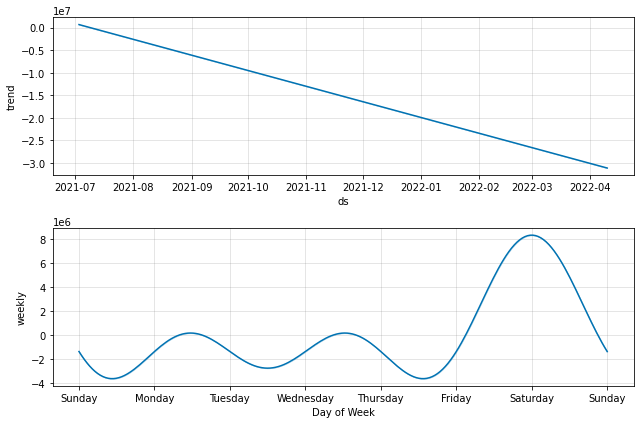

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
with open('prophetModel.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model
files.download('prophetModel.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('prophetModel.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

#  ARIMA model

In [ ]:
dataFrame['week_end'] = pd.to_datetime(dataFrame['week_end'])
dataFrame2['week_end'] = pd.to_datetime(dataFrame2['week_end'])
dataFrame3['week_end'] = pd.to_datetime(dataFrame3['week_end'])

In [ ]:
mask_train = (dataFrame['week_end'] >= '2020-12-19') & (dataFrame['week_end'] <= '2021-5-31')
mask_train2 = (dataFrame2['week_end'] >= '2020-12-19') & (dataFrame2['week_end'] <= '2021-7-30')
mask_train3 = (dataFrame3['week_end'] >= '2020-12-19') & (dataFrame3['week_end'] <= '2021-7-31')

df_numtotal_partially_train = dataFrame[dataFrame['prename']=='Canada' ].loc[mask_train][['week_end','numtotal_partially']]
df2_numtotal_atleast1dose_train = dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")].loc[mask_train2][['week_end','numtotal_atleast1dose']]
df3_numtotal_fully_train = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")].loc[mask_train3][['week_end','numtotal_fully']]
# df3_numtotal_fully_train = dataFrame2[dataFrame3['prename']=='Canada'].loc[mask_train2][['week_end','numtotal_fully']]

df_numtotal_partially_train.columns = ["ds","y"]
df2_numtotal_atleast1dose_train.columns = ["ds","y"]
df3_numtotal_fully_train.columns = ["ds","y"]
df2_numtotal_atleast1dose_train



,ds,y
635,2021-03-13,75900.0
705,2021-03-20,309988.0
775,2021-03-27,438922.0
846,2021-04-03,479055.0
930,2021-04-10,373614.0
1014,2021-04-17,378149.0
1098,2021-04-24,380721.0
1182,2021-05-01,383161.0
1266,2021-05-08,384101.0
1350,2021-05-15,385335.0


In [ ]:
mask_test = (dataFrame['week_end'] >= '2021-6-1') & (dataFrame['week_end'] <= '2021-8-30')
mask_test2 = (dataFrame2['week_end'] >= '2021-8-1') & (dataFrame2['week_end'] <= '2021-8-30')
mask_test3 = (dataFrame3['week_end'] >= '2021-8-1') & (dataFrame3['week_end'] <= '2021-8-30')

df_numtotal_partially_test = dataFrame[dataFrame['prename']=='Canada'].loc[mask_test][['week_end','numtotal_partially']]
df2_numtotal_atleast1dose_test = dataFrame2[(dataFrame3['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")].loc[mask_test2][['week_end','numtotal_atleast1dose']]
df3_numtotal_fully_test = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")].loc[mask_test3][['week_end','numtotal_fully']]
# df3_numtotal_fully_test = dataFrame3[dataFrame3['prename']=='Canada'].loc[mask_test3][['week_end','numtotal_partially']]

df_numtotal_partially_test.columns = ["ds","y"]
df2_numtotal_atleast1dose_test.columns = ["ds","y"]
df3_numtotal_fully_test.columns = ["ds","y"]
df2_numtotal_atleast1dose_test


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ds,y
2916,2021-08-21,0.0
2924,2021-08-21,0.0
2932,2021-08-28,13052.0
2940,2021-08-28,271.0


In [ ]:

cv=dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['numtotal_atleast1dose']
# plt.plot(dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['week_end'],cv.values)
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.131657
p-value: 0.024297


In [ ]:
cv=dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")]['numtotal_fully'].apply(lambda x:int(x))
# plt.plot(dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['week_end'],cv.values)
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.060959
p-value: 0.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



ValueError: ignored

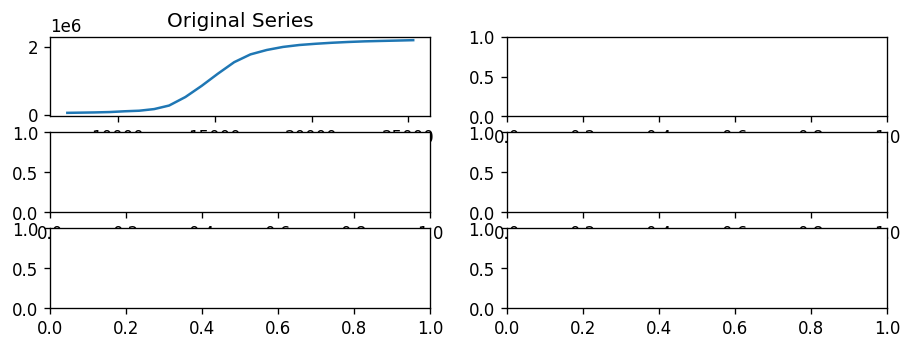

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(cv); axes[0, 0].set_title('Original Series')
plot_pacf(cv.values,lags=13, ax=axes[0, 1])

axes[1, 0].plot(cv.diff()); axes[1, 0].set_title('Original Series')
plot_acf(cv.values, ax=axes[1, 1])

axes[2, 0].plot(cv.diff().diff()); axes[2, 0].set_title('Original Series')
plot_acf(cv.diff().diff().dropna().values, ax=axes[2, 1])

# r=2

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



ValueError: ignored

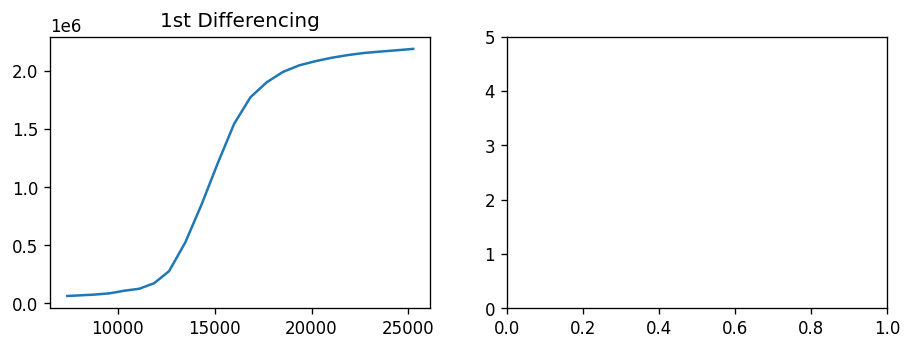

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(cv); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(cv.dropna(), ax=axes[1])

plt.show()

In [ ]:
cv.diff().values

array([    nan,   5148.,   6800.,  10687.,  22629.,  16843.,  47825.,
       103672., 248646., 326446., 357004., 336344., 227482., 128760.,
        89354.,  56459.,  35871.,  29441.,  23134.,  18092.,  12065.,
        10923.,  11820.])

In [ ]:
cv.values

array([  63256,   68404,   75204,   85891,  108520,  125363,  173188,
        276860,  525506,  851952, 1208956, 1545300, 1772782, 1901542,
       1990896, 2047355, 2083226, 2112667, 2135801, 2153893, 2165958,
       2176881, 2188701])

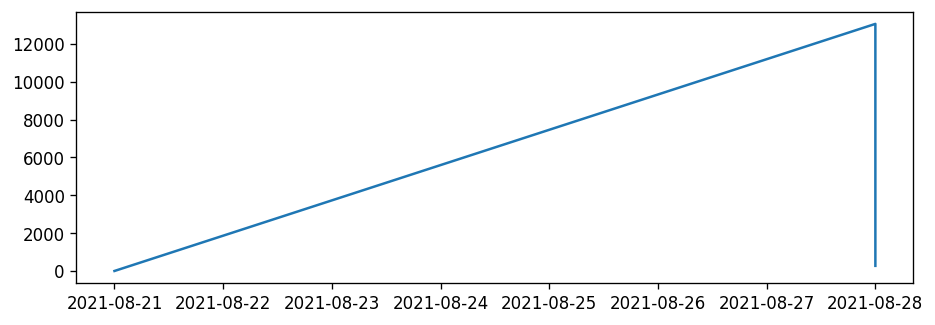

In [ ]:
plt.plot(df2_numtotal_atleast1dose_test['ds'],df2_numtotal_atleast1dose_test['y'])
# dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['week_end'],cv.values

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


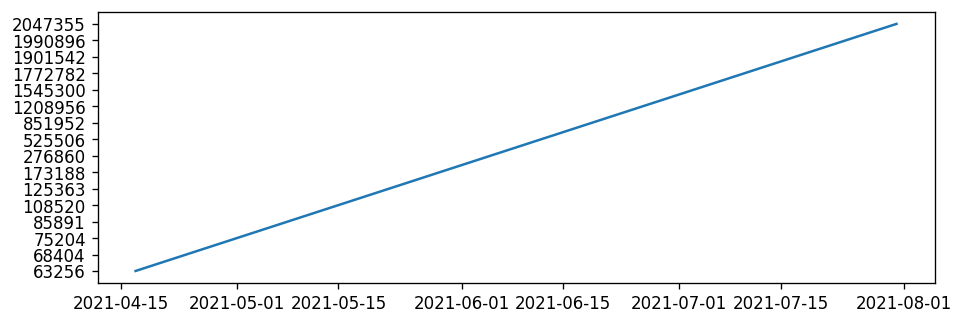

In [ ]:
plt.plot(df3_numtotal_fully_train['ds'],df3_numtotal_fully_train['y'])

In [ ]:
df2_numtotal_atleast1dose_test['y']

2916        0.0
2924        0.0
2932    13052.0
2940      271.0
Name: y, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=21340709.209346, expected=19960756.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=19397789.294272, expected=19218608.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=18360011.479253, expected=17388796.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=15025550.251749, expected=14833867.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=12015076.460266, expected=11888385.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=8802573.129156, expected=9268606.000000
predicted=6908417.667111, expected=7148828.000000
predicted=5402626.998824, expected=5377098.000000
predicted=3865850.710190, expected=4196923.000000
predicted=3401854.539340, expected=3631701.000000
predicted=3454905.433017, expected=3076415.000000
predicted=2586059.322253, expected=2666476.000000
predicted=2441073.459431, expected=2404840.000000
Test RMSE: 520468.573


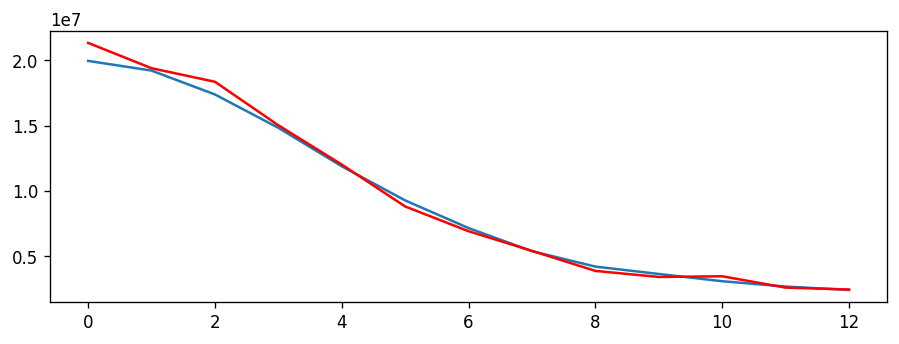

13

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X = df_numtotal_partially_train['y'].to_list()
size = int(len(X) * 0.66)
train = X
test = df_numtotal_partially_test['y'].to_list()
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
len(test)

In [ ]:
df3_numtotal_fully_train

,ds,y
7395,2021-04-17,63256
8027,2021-04-24,68404
8797,2021-05-01,75204
9567,2021-05-08,85891
10337,2021-05-15,108520
11107,2021-05-22,125363
11877,2021-05-29,173188
12648,2021-06-05,276860
13488,2021-06-12,525506
14328,2021-06-19,851952


7395       63256
8027       68404
8797       75204
9567       85891
10337     108520
11107     125363
11877     173188
12648     276860
13488     525506
14328     851952
15168    1208956
16008    1545300
16848    1772782
17688    1901542
18528    1990896
19368    2047355
Name: y, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -183.271
Date:                Fri, 17 Dec 2021   AIC                            378.542
Time:                        00:52:13   BIC                            382.790
Sample:                             0   HQIC                           378.497
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5269      0.317      1.663      0.096      -0.094       1.148
ar.L2          0.8905      0.046     19.447      0.000       0.801       0.980
ar.L3         -0.6364      0.300     -2.121      0.0

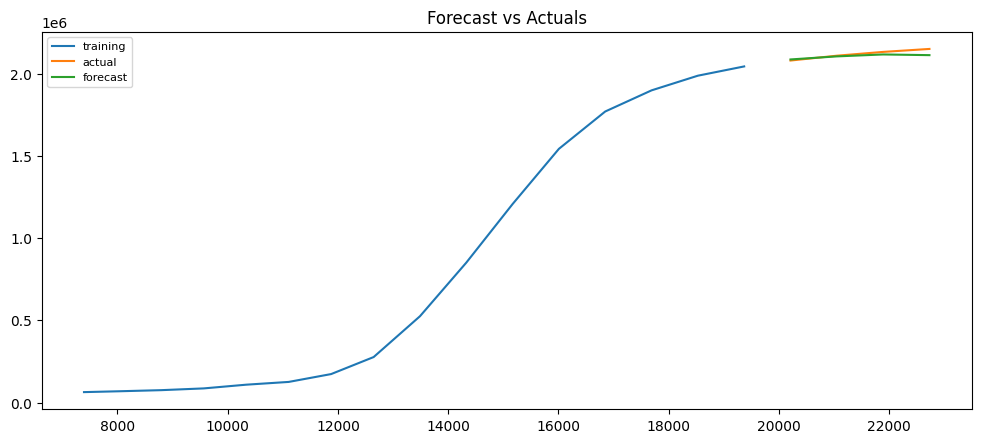

20817.794250399653


In [ ]:
train = df3_numtotal_fully_train['y'].apply(lambda x:int(x))
test = df3_numtotal_fully_test['y'].apply(lambda x:int(x))
print(train)
model = ARIMA(train.values, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

conf = fitted.forecast(4, alpha=0.04)  # 95% conf

# Make as pandas series
fc_series = pd.Series(conf, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(sqrt(mean_squared_error(test.to_list(), conf))
)



635      75900
705     309988
775     438922
846     479055
930     373614
1014    378149
1098    380721
1182    383161
1266    384101
1350    385335
1434    385633
1518    385192
1602    311024
1700    226738
1812    158466
1924    112413
2036     93230
2148     84332
2260     22015
2372     20250
Name: y, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -248.474
Date:                Fri, 17 Dec 2021   AIC                            512.947
Time:                        00:52:18   BIC                            520.913
Sample:                             0   HQIC                           514.502
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.694e+05   1.12e+04     23.961      0.000    2.47e+05    2.91e+05
ar.L1          2.2852      0.110     20.731      0.000       2.069       2.501
ar.L2         -1.9157      0.244     -7.846      0.0

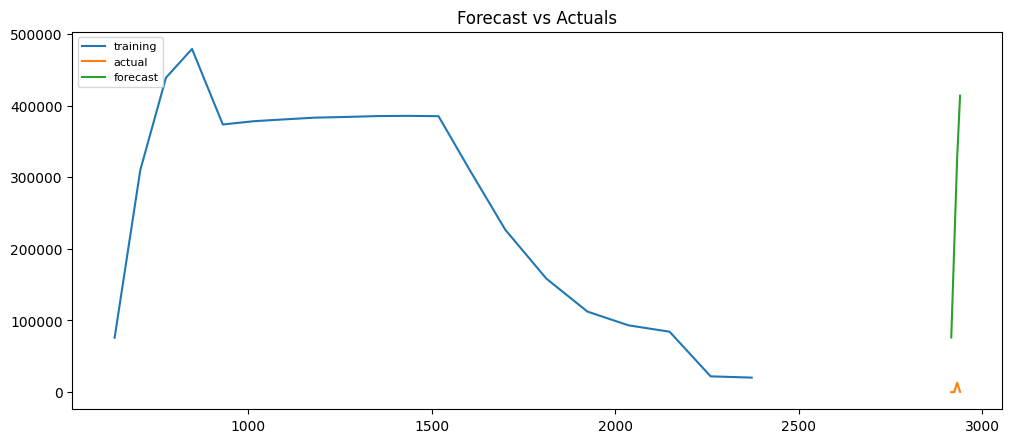

281077.88630024175


In [ ]:
train = df2_numtotal_atleast1dose_train['y'].apply(lambda x:int(x))
test = df2_numtotal_atleast1dose_test['y'].apply(lambda x:int(x))
print(train)
model = ARIMA(train.values, order=(5, 0, 1))  
fitted = model.fit()  
print(fitted.summary())

conf = fitted.forecast(4, alpha=0.04)  # 95% conf

# Make as pandas series
fc_series = pd.Series(conf, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(sqrt(mean_squared_error(test.to_list(), conf))
)

In [ ]:
from pmdarima.arima import auto_arima
arima_model =  auto_arima(df_numtotal_partially_train["y"],start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

# predicted = arima_model.predict()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=350.878, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=344.185, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=342.335, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=311.309, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=312.995, Time=0.51 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=313.100, Time=0.49 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=314.995, Time=0.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=311.239, Time=0.55 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=312.345, Time=0.86 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=312.687, Time=0.72 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=314.34

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(1,1,3)(0,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").



 ARIMA(1,1,3)(0,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,3)(0,1,0)[12]             : AIC=nan, Time=0.22 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,1,3)(0,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").



 ARIMA(2,1,3)(0,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,2)(0,1,0)[12] intercept   : AIC=310.105, Time=0.24 sec
 ARIMA(1,1,2)(1,1,0)[12] intercept   : AIC=311.816, Time=0.50 sec
 ARIMA(1,1,2)(0,1,1)[12] intercept   : AIC=311.822, Time=0.60 sec
 ARIMA(1,1,2)(1,1,1)[12] intercept   : AIC=313.815, Time=0.76 sec
 ARIMA(0,1,2)(0,1,0)[12] intercept   : AIC=309.347, Time=0.18 sec
 ARIMA(0,1,2)(1,1,0)[12] intercept   : AIC=310.603, Time=0.38 sec
 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=310.548, Time=0.35 sec
 ARIMA(0,1,2)(1,1,1)[12] intercept   : AIC=312.111, Time=0.52 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,3)(0,1,0)[12] intercept   : AIC=nan, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12] intercept   : AIC=306.708, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=307.746, Time=0.53 sec
 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=308.520, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12] intercept   : AIC=309.653, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12

In [ ]:
predicted = arima_model.predict(n_periods=13)

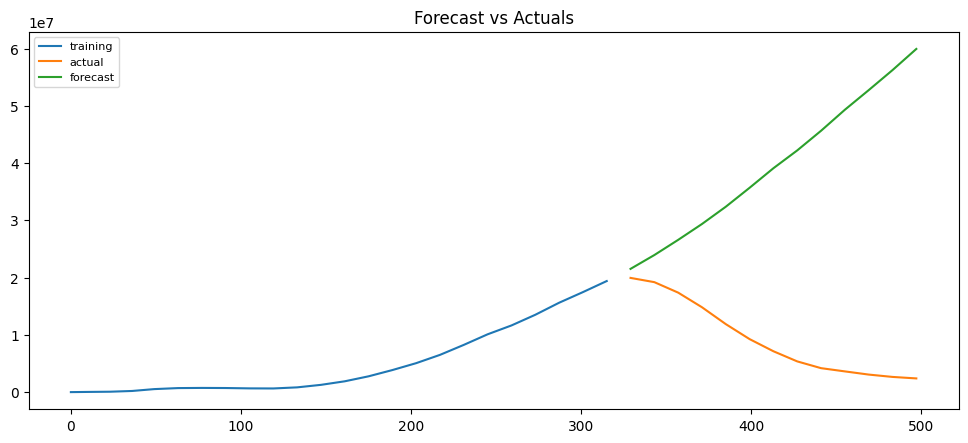

In [ ]:
len(df_numtotal_partially_test["y"])

fc_series = pd.Series(predicted, index=df_numtotal_partially_test["y"].index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_numtotal_partially_train["y"], label='training')
plt.plot(df_numtotal_partially_test["y"], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Lik

Test RMSE: 8034.876


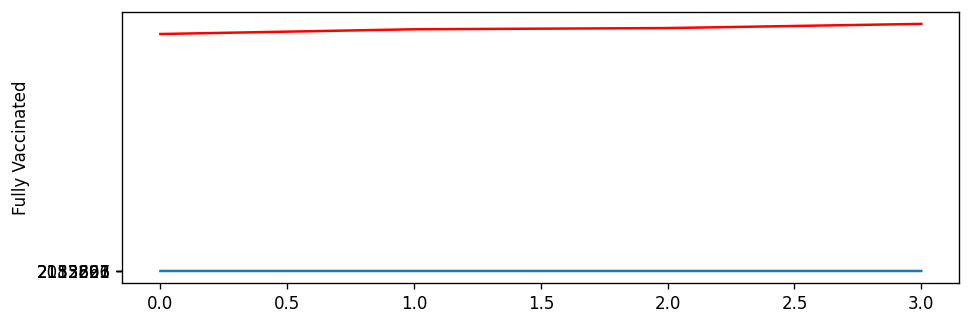

In [ ]:
X = df3_numtotal_fully_train['y'].to_list()
size = int(len(X) * 0.66)
train = X
test = df3_numtotal_fully_test['y'].to_list()
history = [int(x) for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = int(test[t])
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.ylabel("Fully Vaccinated")
plt.show()
len(test)
df_3 = pd.DataFrame({"date":df3_numtotal_fully_test['ds'].to_list(),"test":test,"predicted":predictions})

In [ ]:
# history.astype(np.float)
history

[63256,
 68404,
 75204,
 85891,
 108520,
 125363,
 173188,
 276860,
 525506,
 851952,
 1208956,
 1545300,
 1772782,
 1901542,
 1990896,
 2047355,
 2083226,
 2112667,
 2135801,
 2153893]

In [ ]:
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

X = df_numtotal_partially_train['y'].to_list()
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



predicted=5105587.387245, expected=5072294.000000
predicted=6255240.429488, expected=6520540.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



LinAlgError: ignored

# Correlation heatmap dataFrame





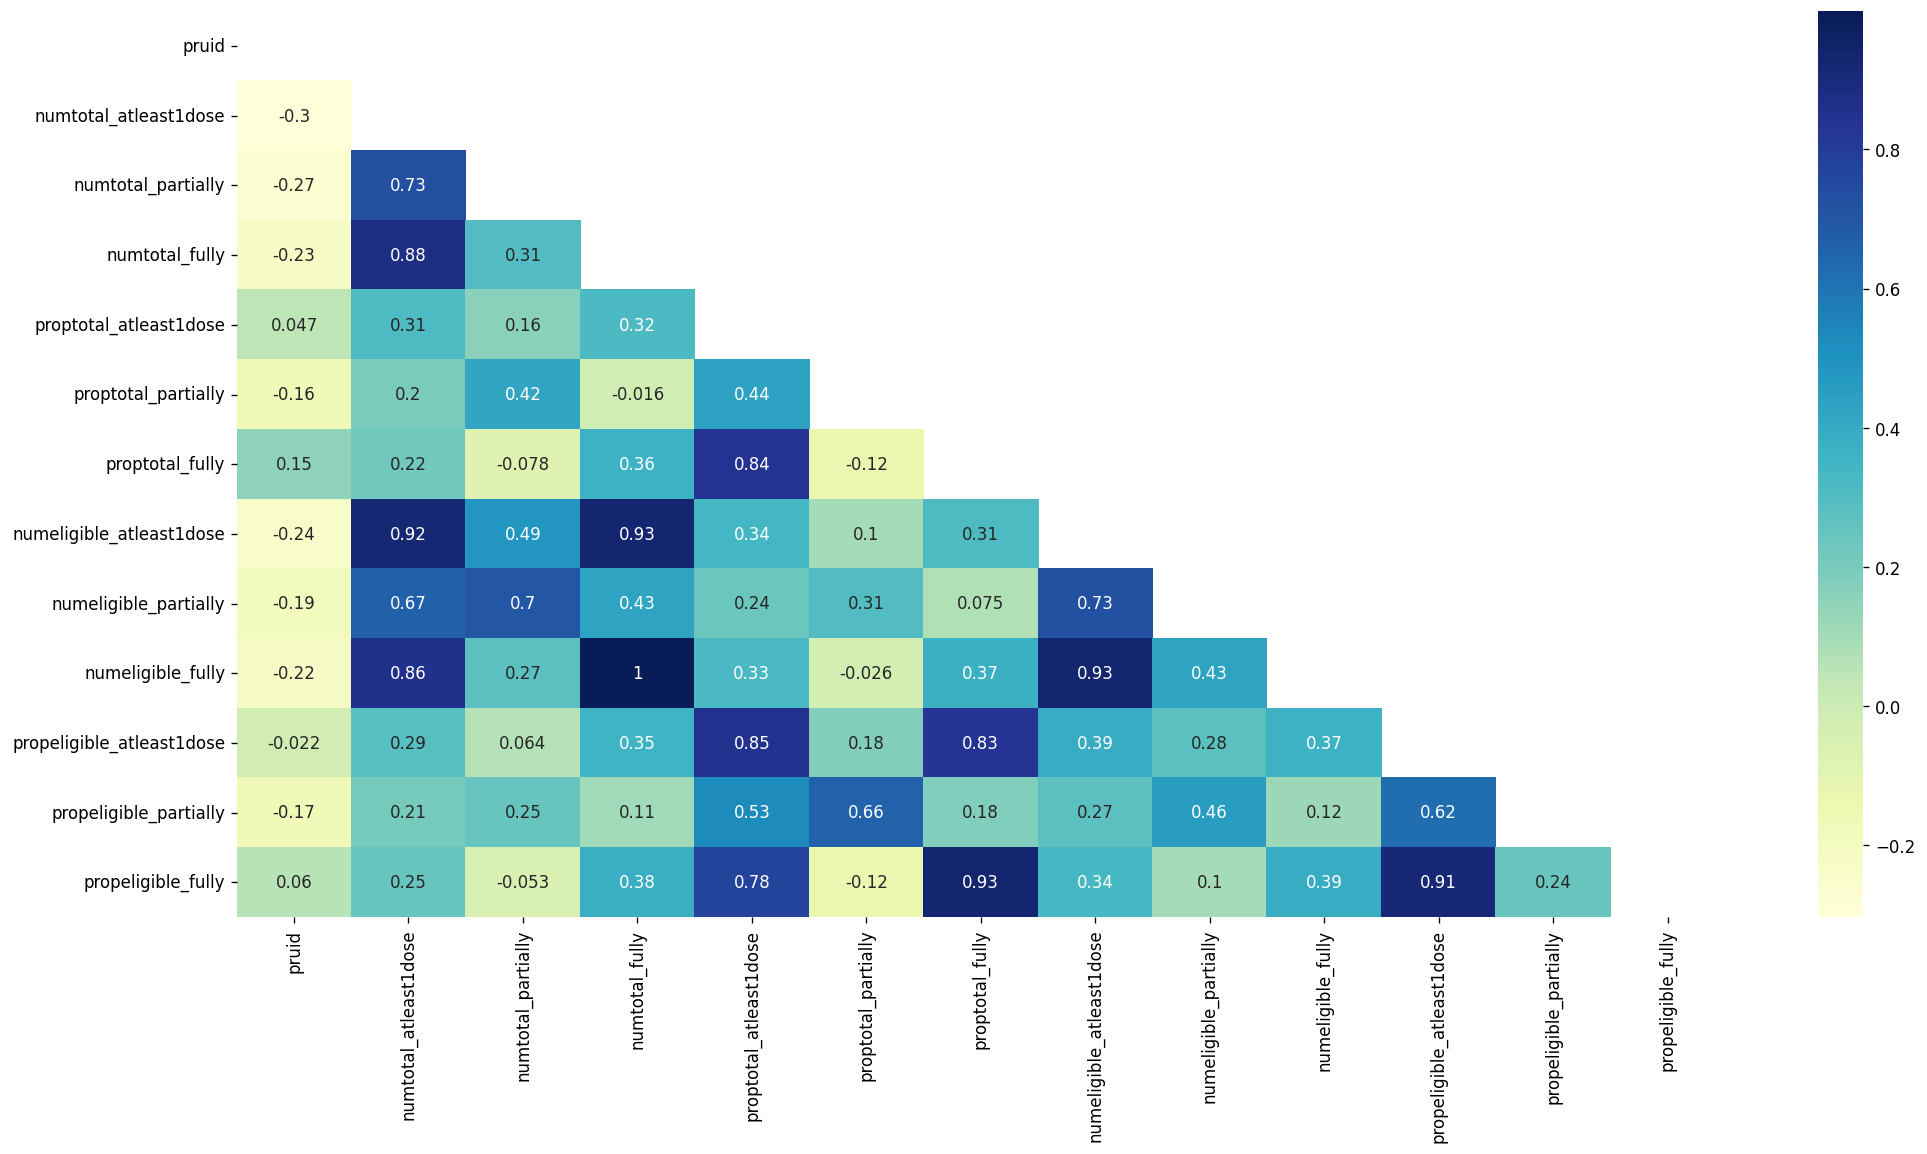

In [ ]:
mask = np.triu(np.ones_like(dataFrame.corr()))
fig, ax = mp.subplots(figsize=(20,10))
dataplot = sb.heatmap(dataFrame.corr(), cmap="YlGnBu", annot=True, mask=mask)
mp.show()

In [ ]:
dataFrame.head()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# dataFrame2 EDA

In [ ]:
dataFrame2.shape

(3421, 16)

In [ ]:
dataFrame2.size

54736

In [ ]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   pruid                      3421 non-null   int64         
 1   prename                    3421 non-null   object        
 2   prfname                    3421 non-null   object        
 3   week_end                   3421 non-null   datetime64[ns]
 4   product_name               3421 non-null   object        
 5   numtotal_atleast1dose      3248 non-null   float64       
 6   numtotal_partially         3240 non-null   object        
 7   numtotal_fully             3186 non-null   float64       
 8   prop_atleast1dose          3248 non-null   object        
 9   prop_partially             3240 non-null   object        
 10  prop_fully                 3186 non-null   object        
 11  Unnamed: 11                0 non-null      float64       
 12  numwee

In [ ]:
dataFrame2.describe()

,pruid,numtotal_atleast1dose,numtotal_fully,Unnamed: 11,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_partially,propweekdelta_fully
count,3421.000000,3.248000e+03,3.186000e+03,0.0,0.0,0.0,0.0,0.0
mean,34.957030,3.468119e+05,1.950012e+05,NaN,NaN,NaN,NaN,NaN
std,21.649336,1.361578e+06,9.394132e+05,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,12.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,46.000000,9.930000e+02,5.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,59.000000,6.045025e+04,1.327400e+04,NaN,NaN,NaN,NaN,NaN
max,62.000000,1.401656e+07,1.249983e+07,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dataFrame2.isnull().sum())

pruid                           0
prename                         0
prfname                         0
week_end                        0
product_name                    0
numtotal_atleast1dose         173
numtotal_partially            181
numtotal_fully                235
prop_atleast1dose             173
prop_partially                181
prop_fully                    235
Unnamed: 11                  3421
numweekdelta_atleast1dose    3421
numweekdelta_fully           3421
propweekdelta_partially      3421
propweekdelta_fully          3421
dtype: int64


In [ ]:
print(dataFrame2['prename'].unique())

['Canada' 'Newfoundland and Labrador' 'Nova Scotia' 'Quebec' 'Manitoba'
 'Saskatchewan' 'British Columbia' 'Yukon' 'Northwest Territories'
 'Nunavut' 'Prince Edward Island' 'New Brunswick' 'Alberta' 'Ontario']


In [ ]:
print(dataFrame2['prfname'].unique())

['Canada' 'Terre-Neuve-et-Labrador' 'Nouvelle-Écosse' 'Québec' 'Manitoba'
 'Saskatchewan' 'Colombie-Britannique' 'Yukon' 'Territoires du Nord-Ouest'
 'Nunavut' 'Île-du-Prince-Édouard' 'Nouveau-Brunswick' 'Alberta' 'Ontario']


In [ ]:
print(dataFrame2['product_name'].unique())

['Not reported' 'Pfizer-BioNTech' 'Unknown' 'Moderna' 'AstraZeneca'
 'COVISHIELD' 'Combination' 'Janssen' 'Other']


In [ ]:
print(dataFrame2['numtotal_partially'].unique())

['0' '12360' '2' ... '346' '2208' '766']


In [ ]:
dataFrame2 = dataFrame2.drop(['propweekdelta_fully', 'propweekdelta_partially','numweekdelta_fully','numweekdelta_atleast1dose','Unnamed: 11'], axis = 1)

In [ ]:
print(dataFrame2.isnull().sum())

pruid                      0
prename                    0
prfname                    0
week_end                   0
product_name               0
numtotal_atleast1dose    173
numtotal_partially       181
numtotal_fully           235
prop_atleast1dose        173
prop_partially           181
prop_fully               235
dtype: int64


In [ ]:
dataFrame2['numtotal_atleast1dose']=dataFrame2['numtotal_atleast1dose'].fillna(0)
dataFrame2['numtotal_partially']=dataFrame2['numtotal_partially'].fillna(0)
dataFrame2['numtotal_fully']=dataFrame2['numtotal_fully'].fillna(0)


In [ ]:
for i in range(0,3421):
  diff = dataFrame2['numtotal_atleast1dose'].iloc[i:i+1]-dataFrame2['numtotal_fully'].iloc[i:i+1]
  #print(diff)
  dataFrame2['numtotal_partially'].iloc[i:i+1] = diff

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataFrame2.iloc[1613:1614]

,pruid,prename,prfname,week_end,product_name,numtotal_atleast1dose,numtotal_partially,numtotal_fully,prop_atleast1dose,prop_partially,prop_fully
1613,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2021-06-05,Pfizer-BioNTech,236086.0,223520,12566.0,45.22,NaN,2.41


In [ ]:
dataFrame2['prop_atleast1dose']=dataFrame2['prop_atleast1dose'].fillna(0)
dataFrame2['prop_partially']=dataFrame2['prop_partially'].fillna(0)
dataFrame2['prop_fully']=dataFrame2['prop_fully'].fillna(0)

In [ ]:
dataFrame2["prop_atleast1dose"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame2["prop_fully"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame2["prop_partially"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame2["prop_partially"].replace({"na": "0"}, inplace=True)



In [ ]:
dataFrame2["prop_partially"] = pd.to_numeric(dataFrame2["prop_partially"], downcast="float")
dataFrame2["prop_fully"] = pd.to_numeric(dataFrame2["prop_fully"], downcast="float")
dataFrame2["prop_atleast1dose"] = pd.to_numeric(dataFrame2["prop_atleast1dose"], downcast="float")
dataFrame2["numtotal_partially"] = pd.to_numeric(dataFrame2["numtotal_partially"], downcast="float")

In [ ]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pruid                  3421 non-null   int64         
 1   prename                3421 non-null   object        
 2   prfname                3421 non-null   object        
 3   week_end               3421 non-null   datetime64[ns]
 4   product_name           3421 non-null   object        
 5   numtotal_atleast1dose  3421 non-null   float64       
 6   numtotal_partially     3421 non-null   float32       
 7   numtotal_fully         3421 non-null   float64       
 8   prop_atleast1dose      3421 non-null   float32       
 9   prop_partially         3421 non-null   float32       
 10  prop_fully             3421 non-null   float32       
dtypes: datetime64[ns](1), float32(4), float64(2), int64(1), object(3)
memory usage: 240.7+ KB


In [ ]:
dataFrame2['week_end'] = pd.to_datetime(dataFrame2['week_end'])

In [ ]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pruid                  3421 non-null   int64         
 1   prename                3421 non-null   object        
 2   prfname                3421 non-null   object        
 3   week_end               3421 non-null   datetime64[ns]
 4   product_name           3421 non-null   object        
 5   numtotal_atleast1dose  3421 non-null   float64       
 6   numtotal_partially     3421 non-null   float32       
 7   numtotal_fully         3421 non-null   float64       
 8   prop_atleast1dose      3421 non-null   float32       
 9   prop_partially         3421 non-null   float32       
 10  prop_fully             3421 non-null   float32       
dtypes: datetime64[ns](1), float32(4), float64(2), int64(1), object(3)
memory usage: 240.7+ KB


In [ ]:
dataFrame2['week_end']

0      2020-12-19
1      2020-12-19
2      2020-12-19
3      2020-12-19
4      2020-12-19
          ...    
3416   2021-09-18
3417   2021-09-18
3418   2021-09-18
3419   2021-09-18
3420   2021-09-18
Name: week_end, Length: 3421, dtype: datetime64[ns]

In [ ]:
dataFrame_numtotal_atleast1dose = dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2['product_name']=='COVISHIELD')]
dataFrame_numtotal_atleast1dose.head()  

,pruid,prename,prfname,week_end,product_name,numtotal_atleast1dose,numtotal_partially,numtotal_fully,prop_atleast1dose,prop_partially,prop_fully
635,1,Canada,Canada,2021-03-13,COVISHIELD,75900.0,75900.0,0.0,0.20,0.20,0.00
705,1,Canada,Canada,2021-03-20,COVISHIELD,309988.0,309987.0,1.0,0.82,0.82,0.01
775,1,Canada,Canada,2021-03-27,COVISHIELD,438922.0,438922.0,0.0,1.15,1.15,0.00
846,1,Canada,Canada,2021-04-03,COVISHIELD,479055.0,479053.0,2.0,1.26,1.26,0.01
930,1,Canada,Canada,2021-04-10,COVISHIELD,373614.0,373576.0,38.0,0.98,0.98,0.01


In [ ]:
dataFrame_numtotal_atleast1dose = dataFrame_numtotal_atleast1dose[['week_end', 'numtotal_atleast1dose']].copy()
dataFrame_numtotal_atleast1dose.head()

,week_end,numtotal_atleast1dose
635,2021-03-13,75900.0
705,2021-03-20,309988.0
775,2021-03-27,438922.0
846,2021-04-03,479055.0
930,2021-04-10,373614.0


In [ ]:
dataFrame_numtotal_atleast1dose.columns = ['ds', 'y']
dataFrame_numtotal_atleast1dose.head()

,ds,y
635,2021-03-13,75900.0
705,2021-03-20,309988.0
775,2021-03-27,438922.0
846,2021-04-03,479055.0
930,2021-04-10,373614.0


In [ ]:
mask = (dataFrame_numtotal_atleast1dose['ds'] >= '2021-07-01') & (dataFrame_numtotal_atleast1dose['ds'] <= '2021-09-30')
dataFrame_numtotal_atleast1dose.loc[mask].head()

,ds,y
2036,2021-07-03,93230.0
2148,2021-07-10,84332.0
2260,2021-07-17,22015.0
2372,2021-07-24,20250.0
2484,2021-07-31,20618.0


In [ ]:
m = Prophet(weekly_seasonality=True)
m.fit(dataFrame_numtotal_atleast1dose.loc[mask])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


In [ ]:
future = m.make_future_dataframe(periods=30,freq='W')
future.head()

,ds
0,2021-07-03
1,2021-07-10
2,2021-07-17
3,2021-07-24
4,2021-07-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].where((forecast['ds']>='2021-08-1') & (forecast['ds']<='2021-08-30'))

,ds,yhat,yhat_lower,yhat_upper
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN
5,2021-08-07,30674.721293,6777.149063,55619.298738
6,2021-08-14,24902.077255,1131.440514,48682.312953
7,2021-08-21,19129.433218,-5455.705037,41495.776421
8,2021-08-28,13356.789183,-10287.623914,35894.935480
9,NaT,NaN,NaN,NaN


In [ ]:
mask = (dataFrame2['week_end'] >= '2021-8-1') & (dataFrame2['week_end'] <= '2021-8-30')
df_numtotal_atleast1dose = dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2['product_name']=='COVISHIELD')].loc[mask].head()

In [ ]:
df_numtotal_atleast1dose[['week_end','numtotal_atleast1dose']]

,week_end,numtotal_atleast1dose
2596,2021-08-07,14504.0
2708,2021-08-14,14026.0
2820,2021-08-21,13529.0
2932,2021-08-28,13052.0


In [ ]:
df_cv = cross_validation(m, initial='10 days', period='30 days', horizon = '10 days')
df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2021-08-09 00:00:00 and 2021-09-08 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-08-14,-16091.380713,-35629.634700,3655.505282,14026.0,2021-08-09
1,2021-09-11,-12208.290861,-35259.578995,9691.922445,12453.0,2021-09-08
2,2021-09-18,-20030.487300,-45233.006029,3105.227782,12646.0,2021-09-08


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6.081793e+08,24661.290861,24661.290861,1.980349,1.980349,2.0,0.0
1,5 days,9.070566e+08,30117.380713,30117.380713,2.147254,2.147254,2.0,0.0
2,10 days,1.067753e+09,32676.487300,32676.487300,2.583939,2.583939,2.0,0.0


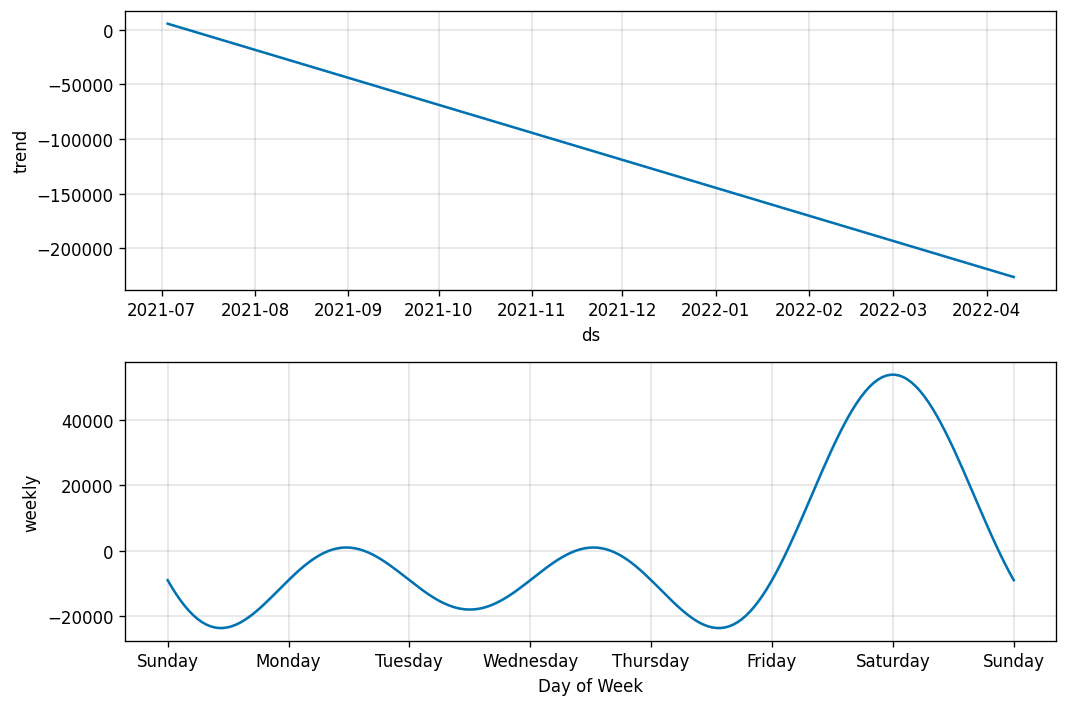

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
plot_plotly(m, forecast)

## Correlation heatmap dataFrame2

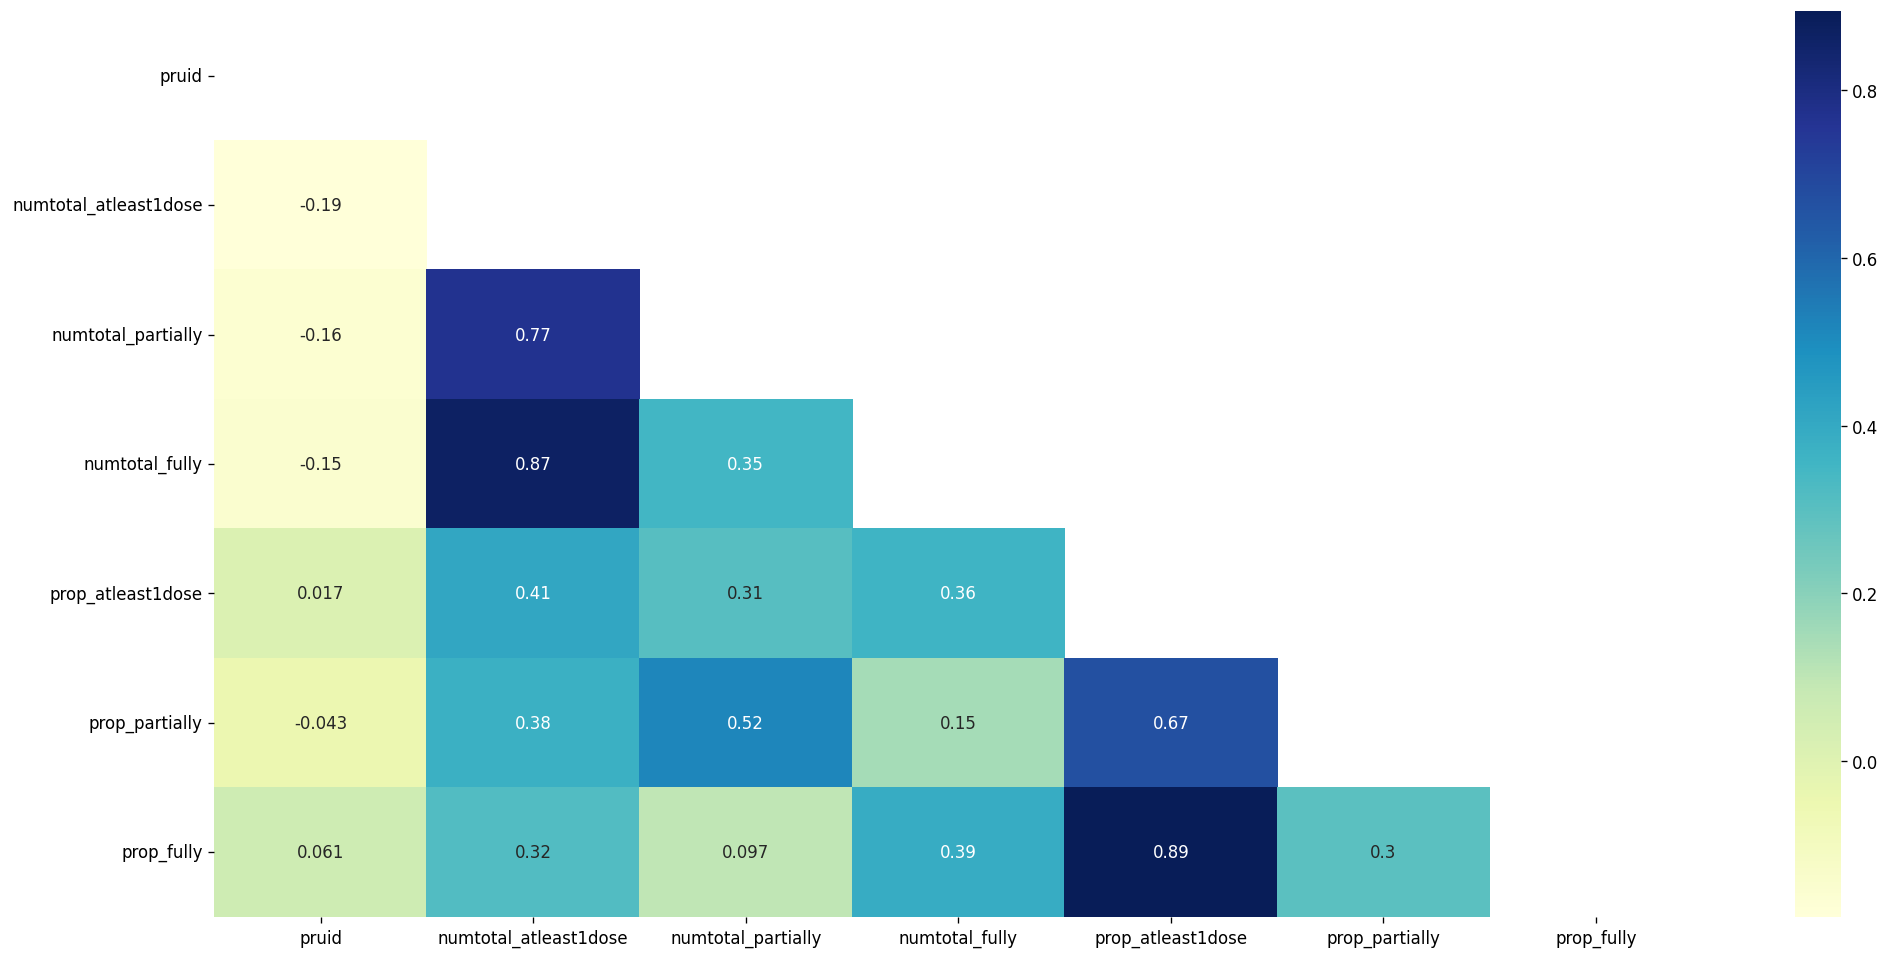

In [ ]:
mask = np.triu(np.ones_like(dataFrame2.corr()))
fig, ax = mp.subplots(figsize=(20,10))
dataplot = sb.heatmap(dataFrame2.corr(), cmap="YlGnBu", annot=True, mask=mask)
mp.show()

In [ ]:
print(dataFrame2.isnull().sum())

pruid                    0
prename                  0
prfname                  0
week_end                 0
product_name             0
numtotal_atleast1dose    0
numtotal_partially       0
numtotal_fully           0
prop_atleast1dose        0
prop_partially           0
prop_fully               0
dtype: int64


## dataFrame3 EDA

In [ ]:
dataFrame3.shape

(26082, 20)

In [ ]:
dataFrame3.size

521640

In [ ]:
dataFrame3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   pruid                      26082 non-null  int64         
 1   prename                    26082 non-null  object        
 2   prfname                    26082 non-null  object        
 3   week_end                   26082 non-null  datetime64[ns]
 4   sex                        26082 non-null  object        
 5   age                        26082 non-null  object        
 6   numtotal_atleast1dose      26082 non-null  object        
 7   numtotal_partially         25542 non-null  object        
 8   numtotal_fully             25634 non-null  object        
 9   prop_atleast1dose          26082 non-null  object        
 10  prop_partially             25542 non-null  object        
 11  prop_fully                 25914 non-null  object        
 12  numw

In [ ]:
dataFrame3.describe()

,pruid,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_partially,propweekdelta_fully,numtotal_partiallyrange,numtotal_fullyrange,prop_partiallyrange,prop_fullyrange
count,26082.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,34.968446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21.656767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dataFrame3.isnull().sum())

pruid                            0
prename                          0
prfname                          0
week_end                         0
sex                              0
age                              0
numtotal_atleast1dose            0
numtotal_partially             540
numtotal_fully                 448
prop_atleast1dose                0
prop_partially                 540
prop_fully                     168
numweekdelta_atleast1dose    26082
numweekdelta_fully           26082
propweekdelta_partially      26082
propweekdelta_fully          26082
numtotal_partiallyrange      26082
numtotal_fullyrange          26082
prop_partiallyrange          26082
prop_fullyrange              26082
dtype: int64


In [ ]:
print(dataFrame3['prfname'].unique())

['Canada' 'Terre-Neuve-et-Labrador' 'Nouvelle-Écosse' 'Québec' 'Manitoba'
 'Saskatchewan' 'Colombie-Britannique' 'Yukon' 'Territoires du Nord-Ouest'
 'Nunavut' 'Île-du-Prince-Édouard' 'Nouveau-Brunswick' 'Alberta' 'Ontario']


In [ ]:
print(dataFrame3['prename'].unique())

['Canada' 'Newfoundland and Labrador' 'Nova Scotia' 'Quebec' 'Manitoba'
 'Saskatchewan' 'British Columbia' 'Yukon' 'Northwest Territories'
 'Nunavut' 'Prince Edward Island' 'New Brunswick' 'Alberta' 'Ontario']


In [ ]:
print(dataFrame3['sex'].unique())

['f' 'm' 'Unknown' 'Not reported' 'Other']


In [ ]:
print(dataFrame3['age'].unique())

['0-15' '16-69' '70-74' '75-79' '80+' 'All ages' 'Not reported' 'Unknown'
 '0-17' '18-69' '18-49' '50-59' '60-69' '70-79' '18-29' '30-39' '40-49'
 '0-11' '12-17']


In [ ]:
print(dataFrame3['numtotal_atleast1dose'].unique())

['0' '8602' '94' ... '2056' '1128' '12436']


In [ ]:
#dataFrame3 = dataFrame3.drop(['numweekdelta_atleast1dose', 'numweekdelta_fully','propweekdelta_partially','propweekdelta_fully','numtotal_partiallyrange','numtotal_fullyrange','prop_partiallyrange','prop_fullyrange'], axis = 1)

In [ ]:
dataFrame3["numtotal_atleast1dose"].replace({"na": "0"}, inplace=True)
dataFrame3["numtotal_partially"].replace({"na": "0"}, inplace=True)
dataFrame3["numtotal_fully"].replace({"na": "0"}, inplace=True)
dataFrame3["prop_atleast1dose"].replace({"na": "0"}, inplace=True)
dataFrame3["prop_partially"].replace({"na": "0"}, inplace=True)
dataFrame3["prop_fully"].replace({"na": "0"}, inplace=True)

In [ ]:
dataFrame3['numtotal_atleast1dose']=dataFrame3['numtotal_atleast1dose'].fillna(0)
dataFrame3["numtotal_partially"]=dataFrame3['numtotal_partially'].fillna(0)
dataFrame3["numtotal_fully"]=dataFrame3['numtotal_fully'].fillna(0)
dataFrame3["prop_atleast1dose"]=dataFrame3['prop_atleast1dose'].fillna(0)
dataFrame3["prop_partially"]=dataFrame3['prop_partially'].fillna(0)
dataFrame3["prop_fully"]=dataFrame3['prop_fully'].fillna(0)

In [ ]:
dataFrame3["prop_atleast1dose"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame3["prop_atleast1dose"].replace({"≥95": "95"}, inplace=True)
dataFrame3["prop_partially"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame3["prop_partially"].replace({"≥95": "95"}, inplace=True)
dataFrame3["prop_fully"].replace({"<0.01": "0.01"}, inplace=True)
dataFrame3["prop_fully"].replace({"≥95": "95"}, inplace=True)

In [ ]:
dataFrame3["numtotal_atleast1dose"] = pd.to_numeric(dataFrame3["numtotal_atleast1dose"], downcast="float")
dataFrame3["numtotal_partially"] = pd.to_numeric(dataFrame3["numtotal_partially"], downcast="float")
dataFrame3["numtotal_fully"] = pd.to_numeric(dataFrame3["numtotal_fully"], downcast="float")
dataFrame3["prop_atleast1dose"] = pd.to_numeric(dataFrame3["prop_atleast1dose"], downcast="float")
dataFrame3["prop_partially"] = pd.to_numeric(dataFrame3["prop_partially"], downcast="float")
dataFrame3["prop_fully"] = pd.to_numeric(dataFrame3["prop_fully"], downcast="float")

In [ ]:
dataFrame3['week_end'] = pd.to_datetime(dataFrame3['week_end'])

In [ ]:
dataFrame_numtotal_fully = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3['sex']=='f') & (dataFrame3['age']=='70-79')]

In [ ]:
dataFrame_numtotal_fully.head()

,pruid,prename,prfname,week_end,sex,age,numtotal_atleast1dose,numtotal_partially,numtotal_fully,prop_atleast1dose,prop_partially,prop_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_partially,propweekdelta_fully,numtotal_partiallyrange,numtotal_fullyrange,prop_partiallyrange,prop_fullyrange
7396,1,Canada,Canada,2021-04-17,f,70-79,1265377.0,1197148.0,68229.0,80.040001,75.720001,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8028,1,Canada,Canada,2021-04-24,f,70-79,1339153.0,1257440.0,81713.0,84.709999,79.540001,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8798,1,Canada,Canada,2021-05-01,f,70-79,1377307.0,1285337.0,91970.0,87.120003,81.300003,5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9568,1,Canada,Canada,2021-05-08,f,70-79,1403095.0,1302749.0,100346.0,88.750000,82.400002,6.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10338,1,Canada,Canada,2021-05-15,f,70-79,1423266.0,1308415.0,114851.0,90.029999,82.760002,7.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame_numtotal_fully = dataFrame_numtotal_fully[['week_end', 'numtotal_fully']].copy()
dataFrame_numtotal_fully.head()

,week_end,numtotal_fully
7396,2021-04-17,68229.0
8028,2021-04-24,81713.0
8798,2021-05-01,91970.0
9568,2021-05-08,100346.0
10338,2021-05-15,114851.0


In [ ]:
dataFrame_numtotal_fully.columns = ['ds', 'y']
dataFrame_numtotal_fully.head()

,ds,y
7396,2021-04-17,68229.0
8028,2021-04-24,81713.0
8798,2021-05-01,91970.0
9568,2021-05-08,100346.0
10338,2021-05-15,114851.0


In [ ]:
mask = (dataFrame_numtotal_fully['ds'] >= '2021-07-1') & (dataFrame_numtotal_fully['ds'] <= '2021-09-30')
dataFrame_numtotal_fully.loc[mask].head()

,ds,y
16009,2021-07-03,1210813.0
16849,2021-07-10,1300043.0
17689,2021-07-17,1354502.0
18529,2021-07-24,1401554.0
19369,2021-07-31,1431524.0


In [ ]:
m = Prophet(weekly_seasonality=True)
m.fit(dataFrame_numtotal_fully.loc[mask])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.


In [ ]:
future = m.make_future_dataframe(periods=60,freq='W')
future.head()

,ds
0,2021-07-03
1,2021-07-10
2,2021-07-17
3,2021-07-24
4,2021-07-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-03,1.210814e+06,1.210716e+06,1.210921e+06
1,2021-07-10,1.300042e+06,1.299949e+06,1.300147e+06
2,2021-07-17,1.354502e+06,1.354390e+06,1.354597e+06
3,2021-07-24,1.401554e+06,1.401448e+06,1.401655e+06
4,2021-07-31,1.431524e+06,1.431416e+06,1.431622e+06
...,...,...,...,...
67,2022-10-09,4.840856e+05,-3.121523e+06,4.218285e+06
68,2022-10-16,4.894090e+05,-3.187247e+06,4.341068e+06
69,2022-10-23,4.947324e+05,-3.273150e+06,4.445804e+06
70,2022-10-30,5.000558e+05,-3.370793e+06,4.566534e+06


In [ ]:
mask = (dataFrame3['week_end'] >= '2021-08-1') & (dataFrame3['week_end'] <= '2021-08-30')
df_numtotal_fully = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3['sex']=='f') & (dataFrame3['age']=='70-79')].loc[mask].head()

In [ ]:
df_numtotal_fully[['week_end','numtotal_fully']]

,week_end,numtotal_fully
20209,2021-08-07,1448379.0
21049,2021-08-14,1460232.0
21889,2021-08-21,1469974.0
22729,2021-08-28,1478356.0


In [ ]:
df_cv = cross_validation(m, initial='10 days', period='30 days', horizon = '10 days')
df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2021-08-09 00:00:00 and 2021-09-08 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-08-14,1.474310e+06,1.464505e+06,1.483077e+06,1460232.0,2021-08-09
1,2021-09-11,1.491549e+06,1.484049e+06,1.498110e+06,1489092.0,2021-09-08
2,2021-09-18,1.498594e+06,1.473363e+06,1.524828e+06,1494419.0,2021-09-08


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6.038051e+06,2457.244556,2457.244556,0.001650,0.001650,0.001649,1.0
1,5 days,1.981968e+08,14078.237681,14078.237681,0.009641,0.009641,0.009595,0.0
2,10 days,1.743088e+07,4175.030576,4175.030576,0.002794,0.002794,0.002790,1.0


In [ ]:
plot_plotly(m, forecast)

## Correlation heatmap dataFrame3

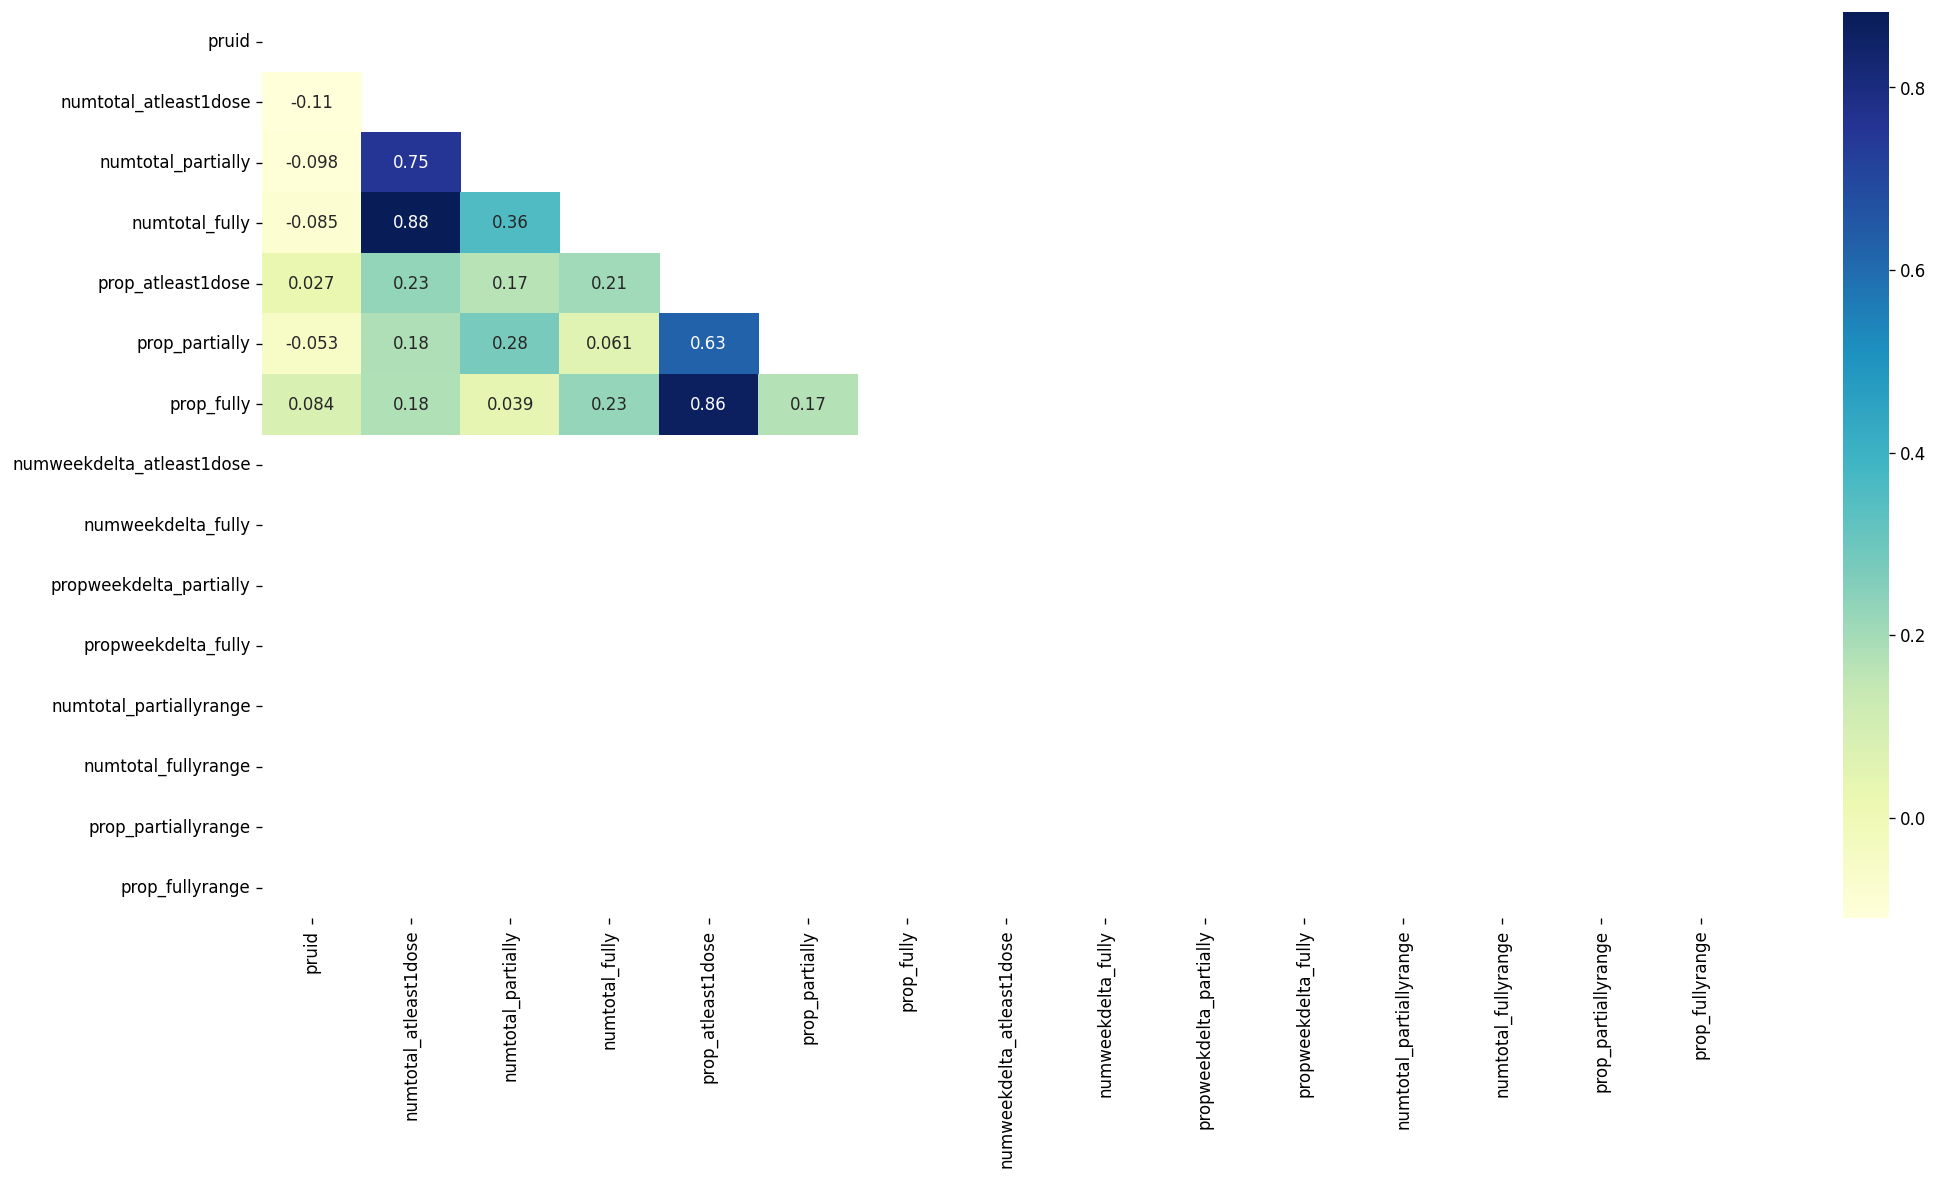

In [ ]:
mask = np.triu(np.ones_like(dataFrame3.corr()))
fig, ax = mp.subplots(figsize=(20,10))
dataplot = sb.heatmap(dataFrame3.corr(), cmap="YlGnBu", annot=True, mask=mask)
mp.show()

In [ ]:
dataFrame3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   pruid                      26082 non-null  int64         
 1   prename                    26082 non-null  object        
 2   prfname                    26082 non-null  object        
 3   week_end                   26082 non-null  datetime64[ns]
 4   sex                        26082 non-null  object        
 5   age                        26082 non-null  object        
 6   numtotal_atleast1dose      26082 non-null  float32       
 7   numtotal_partially         26082 non-null  float32       
 8   numtotal_fully             26082 non-null  float32       
 9   prop_atleast1dose          26082 non-null  float32       
 10  prop_partially             26082 non-null  float32       
 11  prop_fully                 26082 non-null  float32       
 12  numw

## Visualization 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# type(dataFrame["week_end"][0])
df = dataFrame.groupby("week_end")
xy_1dose = df.apply(lambda x:x["numtotal_atleast1dose"].sum())
xy_partial_dose = df.apply(lambda x:x["numtotal_partially"].sum())
xy_full_dose = df.apply(lambda x:x["numtotal_fully"].sum())

In [ ]:
fig = go.Figure()
fig = px.line(xy_1dose, x=xy_1dose.index, y=xy_1dose.values, title='Vaccination Dose')
fig.add_scatter(x=xy_1dose.index, y=xy_1dose.values,mode='lines',name= "Atleast 1 Dose only")
fig.add_scatter(x=xy_partial_dose.index, y=xy_partial_dose.values,mode="lines",name='Partially Vaccinated')
fig.add_scatter( x=xy_full_dose.index, y=xy_full_dose.values,mode='lines',name="Fully Vaccinated")

# fig.add_line(x=xy_1dose.index, y=xy_1dose.values)
# px.line(xy_1dose, x=xy_1dose.index, y=xy_1dose.values, title='Vaccination Dose')
# px.line(xy_partial_dose, x=xy_partial_dose.index, y=xy_partial_dose.values, title='Vaccination Does')
# px.line(xy_full_dose, x=xy_full_dose.index, y=xy_full_dose.values, title='Vaccination Does')

fig.show()

In [ ]:
vaccine_type = dataFrame2["product_name"].value_counts()
color_code =["#CCCCFF","#DE3163","#FF7F50","#6495ED","#40E0D0","#FFBF00","#DFFF00","#808080","#DFDF00"]

fig = px.pie(dataFrame2,values=vaccine_type.values,names = vaccine_type.index,hole=0.4,color = color_code)
fig.show()

In [ ]:
import datetime


In [ ]:
dataFrame3.month  = dataFrame3.week_end.apply(lambda x:x.month)
x = dataFrame3.groupby(by=[dataFrame3.month,dataFrame3.age])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
x.ngroups

108

In [ ]:
dataFrame_coverage = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-map.csv")
dataFrame_coverage.head()

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_partially,numtotal_fully,proptotal_atleast1dose,proptotal_partially,proptotal_fully,numeligible_atleast1dose,numeligible_partially,numeligible_fully,propeligible_atleast1dose,propeligible_partially,propeligible_fully,numweekdelta_atleast1dose,numweekdelta_fully,propweekdelta_atleast1dose,propweekdelta_fully
0,2020-12-19,1,Canada,Canada,12362,12362.0,0.0,0.07,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-19,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,972,972.0,0.0,0.19,0.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-19,12,Nova Scotia,Nouvelle-Écosse,1092,1092.0,0.0,0.11,0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19,24,Quebec,Québec,4728,4728.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-19,46,Manitoba,Manitoba,894,894.0,0.0,0.06,0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame_coverage.fillna(0,inplace=True)

In [ ]:
dataFrame_for_bubble=dataFrame_coverage[dataFrame_coverage.prename != 'Canada']
dataFrame_for_bubble.rename(columns={"prename": "province"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

fig_partially_vaccinated = px.scatter(dataFrame_for_bubble, x="week_end", y="numtotal_atleast1dose",size="proptotal_partially",hover_name="province",color="province", title= "Number of Vaccines Administrated and Proportion of Partially Vaccinated in various Provinces")
fig_partially_vaccinated.show()

In [ ]:
import plotly.express as px

fig_fully_vaccinated = px.scatter(dataFrame_for_bubble, x="week_end", y="numtotal_atleast1dose",size="proptotal_fully",hover_name="province",color="province", title= "Number of Vaccines Administrated and Proportion of Fully Vaccinated in various Provinces")
fig_fully_vaccinated.show()

Dataset 2

In [ ]:
dataFrame_vaccinetype = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-byVaccineType.csv")
dataFrame_vaccinetype.fillna(0,inplace=True)

In [ ]:
prename_list=dataFrame_vaccinetype['prename'].unique()
prename_list

array(['Canada', 'Newfoundland and Labrador', 'Nova Scotia', 'Quebec',
       'Manitoba', 'Saskatchewan', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut', 'Prince Edward Island',
       'New Brunswick', 'Alberta', 'Ontario'], dtype=object)

In [ ]:
for i in range(0,len(prename_list)):
  fig_title="Distribution of Various Vaccines in "+prename_list[i]
  fig_d2 = px.scatter(dataFrame_vaccinetype[dataFrame_vaccinetype.prename == prename_list[i]], x="week_end", y="product_name",size="numtotal_atleast1dose",hover_name="prename",color="prename",width=800, height=400, title=fig_title)
  fig_d2.show()

In [ ]:
dataFrame_vclean=dataFrame_vaccinetype[(dataFrame_vaccinetype.prename == 'Canada')]
dataFrame_vclean.drop(columns=['pruid','prfname','numtotal_partially','numtotal_fully','prop_atleast1dose','prop_partially','prop_fully','Unnamed: 11','numweekdelta_atleast1dose','numweekdelta_fully','propweekdelta_partially','propweekdelta_fully'], inplace=True)
dataFrame_vclean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,prename,week_end,product_name,numtotal_atleast1dose
0,Canada,2020-12-19,Not reported,0.0
1,Canada,2020-12-19,Pfizer-BioNTech,12360.0
2,Canada,2020-12-19,Unknown,2.0
30,Canada,2020-12-26,Not reported,0.0
31,Canada,2020-12-26,Pfizer-BioNTech,46153.0
...,...,...,...,...
3299,Canada,2021-09-18,Moderna,4023632.0
3300,Canada,2021-09-18,Not reported,6627796.0
3301,Canada,2021-09-18,Other,1117.0
3302,Canada,2021-09-18,Pfizer-BioNTech,13774873.0


In [ ]:
from datetime import datetime
a = datetime.fromisoformat(dataFrame_vclean['week_end'].min()).timestamp()
b = datetime.fromisoformat(dataFrame_vclean['week_end'].max()).timestamp()
mid_time=a + (b - a)/2

In [ ]:
dataFrame_Cloud1=pd.DataFrame()
dataFrame_Cloud2=pd.DataFrame()

for i in range(0,dataFrame_vclean.shape[0]):
  if datetime.fromisoformat(dataFrame_vclean.iloc[i][1]).timestamp()<mid_time:
    dataFrame_Cloud1=dataFrame_Cloud1.append(dataFrame_vclean.iloc[i,:])
    
  else:
    dataFrame_Cloud2=dataFrame_Cloud2.append(dataFrame_vclean.iloc[i,:])

dataFrame_Cloud1.shape

(92, 4)

In [ ]:
dataFrame_Cloud1.drop(columns=['prename','week_end'], inplace=True)
dataFrame_Cloud2.drop(columns=['prename','week_end'], inplace=True)

In [ ]:
data_cloud1 = [['AstraZeneca',0], ['COVISHIELD',0], ['Combination',0],['Janssen',0],['Moderna',0],['Not reported',0],['Other',0],['Pfizer-BioNTech',0],['Unknown',0]]
data_cloud2 = [['AstraZeneca',0], ['COVISHIELD',0], ['Combination',0],['Janssen',0],['Moderna',0],['Not reported',0],['Other',0],['Pfizer-BioNTech',0],['Unknown',0]]

print(type(data_cloud2))
print((data_cloud1[1][1]))
for i in range(0,len(data_cloud1)):
  #print(data_cloud1[i][0])
  data_cloud1[i][1]=dataFrame_Cloud1[(dataFrame_Cloud1.product_name == data_cloud1[i][0])].sum().iloc[0]
  if data_cloud1[i][0]=="Not reported":
    data_cloud1[i][0]="NotReported"
  elif data_cloud1[i][0]=="Pfizer-BioNTech":
    data_cloud1[i][0]="Pfizer"
#print((data_cloud1))

print((data_cloud1[1][1]))

for i in range(0,len(data_cloud1)):
  #print(data_cloud1[i][0])
  data_cloud2[i][1]=dataFrame_Cloud2[(dataFrame_Cloud2.product_name == data_cloud2[i][0])].sum().iloc[0]
  if data_cloud2[i][0]=="Not reported":
    data_cloud2[i][0]="NotReported"
  elif data_cloud2[i][0]=="Pfizer-BioNTech":
    data_cloud2[i][0]="Pfizer"

#print((data_cloud2))
# Create the pandas DataFrame
dataFrame_for_cloud1 = pd.DataFrame(data_cloud1, columns = ['Vaccine Type', 'Numbers'])
dataFrame_for_cloud2 = pd.DataFrame(data_cloud2, columns = ['Vaccine Type', 'Numbers'])
dataFrame_for_cloud2


<class 'list'>
0
2819510.0


,Vaccine Type,Numbers
0,AstraZeneca,13373790.0
1,COVISHIELD,2682075.0
2,Combination,44373302.0
3,Janssen,20818.0
4,Moderna,69603918.0
5,NotReported,116712404.0
6,Other,1721.0
7,Pfizer,250655749.0
8,Unknown,370734.0


In [ ]:
cloud2_max=dataFrame_for_cloud2.max().iloc[1]
cloud1_max=dataFrame_for_cloud1.max().iloc[1]

In [ ]:
for i in range(0,len(data_cloud1)):
  data_cloud1[i][1]=int((data_cloud1[i][1]/cloud1_max)*1000)

for i in range(0,len(data_cloud1)):
  data_cloud2[i][1]=int((data_cloud2[i][1]/cloud2_max)*1000)

#data_cloud2
#data_cloud1

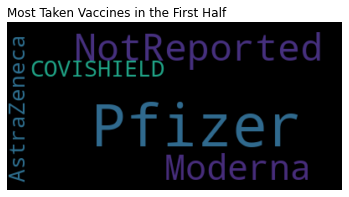

In [ ]:
#Importing Libraries

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

#dataFrame_Cloud1 = pd.read_csv("1.csv")

#Checking the Data

#dataFrame_Cloud1.head()
text1=""
#Creating the text variable
for i in range(0,len(data_cloud1)):
  temp_text=(data_cloud1[i][0]+" ")*data_cloud1[i][1]
  #print(temp_text)
  text1=text1+(temp_text)
#text2 = " ".join(title for title in dataFrame_Cloud1.title)

# Creating word_cloud with text as argument in .generate() method
#print(text2)
word_cloud1 = WordCloud(collocations = False, background_color = 'black').generate(text1)

# Display the generated Word Cloud
plt.title("Most Taken Vaccines in the First Half", fontdict=None, loc='Left', pad=None)
plt.imshow(word_cloud1, interpolation='bilinear')

plt.axis("off")

plt.show()

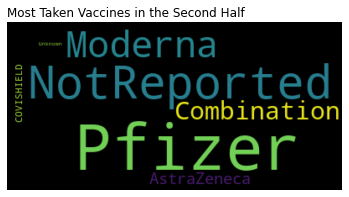

In [ ]:
text2=""
#Creating the text variable
for i in range(0,len(data_cloud2)):
  temp_text=(data_cloud2[i][0]+" ")*data_cloud2[i][1]
  #print(temp_text)
  text2=text2+(temp_text)
#text2 = " ".join(title for title in dataFrame_Cloud1.title)

# Creating word_cloud with text as argument in .generate() method
#print(text2)
word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text2)

# Display the generated Word Cloud
plt.title("Most Taken Vaccines in the Second Half", fontdict=None, loc='Left', pad=None)
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
dataFrame_coverage = pd.read_csv("/content/drive/My Drive/AML 2404 AI & ML Lab/Data Set/vaccination-coverage-byAgeAndSex.csv")


In [ ]:
dataFrame_barChart=dataFrame_coverage[(dataFrame_coverage.prename == 'Canada')&(dataFrame_coverage.week_end == (dataFrame_coverage['week_end'].max()))]

In [ ]:
dataFrame_barChart=dataFrame_barChart[(dataFrame_barChart.age == '0-11')|(dataFrame_barChart.age == '12-17')|(dataFrame_barChart.age == '18-29')|(dataFrame_barChart.age == '30-39')|(dataFrame_barChart.age == '40-49')|(dataFrame_barChart.age == '50-59')|(dataFrame_barChart.age == '60-69')|(dataFrame_barChart.age == '70-79')|(dataFrame_barChart.age == '80+')|(dataFrame_barChart.age == 'Unknown')|(dataFrame_barChart.age == 'Not reported')]

In [ ]:
dataFrame_barChart.shape

(55, 20)

In [ ]:
dataFrame_barChart.drop(columns=['pruid', 'prfname', 'numtotal_partially','numtotal_fully','prop_atleast1dose','prop_partially','prop_fully','numweekdelta_atleast1dose','numweekdelta_fully','propweekdelta_partially','propweekdelta_fully','numtotal_partiallyrange','numtotal_fullyrange','prop_partiallyrange','prop_fullyrange'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataFrame_barChart

,prename,week_end,sex,age,numtotal_atleast1dose
25242,Canada,2021-09-18,f,0-11,5592
25243,Canada,2021-09-18,f,12-17,989962
25244,Canada,2021-09-18,f,18-29,2344487
25245,Canada,2021-09-18,f,30-39,2167892
25246,Canada,2021-09-18,f,40-49,2115942
25247,Canada,2021-09-18,f,50-59,2286943
25248,Canada,2021-09-18,f,60-69,2255901
25249,Canada,2021-09-18,f,70-79,1529104
25250,Canada,2021-09-18,f,80+,949157
25252,Canada,2021-09-18,f,Not reported,0


In [ ]:
dataFrame_barChart_temp=dataFrame_barChart[dataFrame_barChart.sex == 'm']
dataFrame_barChart_temp


,prename,week_end,sex,age,numtotal_atleast1dose
25254,Canada,2021-09-18,m,0-11,5800
25255,Canada,2021-09-18,m,12-17,1019987
25256,Canada,2021-09-18,m,18-29,2353772
25257,Canada,2021-09-18,m,30-39,2094946
25258,Canada,2021-09-18,m,40-49,2002216
25259,Canada,2021-09-18,m,50-59,2189830
25260,Canada,2021-09-18,m,60-69,2128262
25261,Canada,2021-09-18,m,70-79,1378254
25262,Canada,2021-09-18,m,80+,652680
25264,Canada,2021-09-18,m,Not reported,0


In [ ]:
import plotly.graph_objects as go

age_group = dataFrame_barChart[dataFrame_barChart.sex == 'm']['age'].tolist()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=age_group,
    y=dataFrame_barChart[dataFrame_barChart.sex == 'f']['numtotal_atleast1dose'].tolist(),
    name='Female',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=age_group,
    y=dataFrame_barChart[dataFrame_barChart.sex == 'm']['numtotal_atleast1dose'].tolist(),
    name='Male',
    marker_color='orangered'
))
fig.add_trace(go.Bar(
    x=age_group,
    y=dataFrame_barChart[dataFrame_barChart.sex == 'Others']['numtotal_atleast1dose'].tolist(),
    name='Other',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=age_group,
    y=dataFrame_barChart[dataFrame_barChart.sex == 'Unknown']['numtotal_atleast1dose'].tolist(),
    name='Unknown',
    marker_color='darkred'
))
fig.add_trace(go.Bar(
    x=age_group,
    y=dataFrame_barChart[dataFrame_barChart.sex == 'Not reported']['numtotal_atleast1dose'].tolist(),
    name='Not reported',
    marker_color='lightcoral'
))


fig.update_layout(title='Vaccination w.r.t Age & Gender',yaxis=dict(
        title='Number of people taken atleast one dose',
        titlefont_size=16,
        tickfont_size=14,
    ),xaxis=dict(
        title='Age Group',
        titlefont_size=16,
        tickfont_size=14,
    ),barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
import folium

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
m = folium.Map()

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=dataFrame,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['prfname', 'numtotal_atleast1dose'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m

In [ ]:
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure

fig6=Figure(height=850,width=1000)
m6 = folium.Map([61.0062,-107.991], tiles='cartodbpositron', zoom_start=5)
fig6.add_child(m6)

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 43.3 MB/s 
     |████████████████████████████████| 15.4 MB 36.7 MB/s 


In [ ]:
import geopandas

india_geojson=geopandas.read_file('/content/drive/My Drive/AML 2404 AI & ML Lab/georef-canada-province.geojson')
india_geojson.head()


df_covid = dataFrame
df_covid['week_end']=(df_covid['week_end'].astype(int)// 10**9).astype('U10')
covid_dict={}
for i in df_covid['prename'].unique():
    covid_dict[i]={}
    for j in df_covid[df_covid['prename']==i].set_index(['prename']).values:   
        covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

g = TimeSliderChoropleth(
    india_geojson.set_index('prov_name_fr').to_json(),
    styledict=covid_dict
).add_to(m6)
m6

TypeError: ignored

#  ARIMA model

In [ ]:
dataFrame['week_end'] = pd.to_datetime(dataFrame['week_end'])
dataFrame2['week_end'] = pd.to_datetime(dataFrame2['week_end'])
dataFrame3['week_end'] = pd.to_datetime(dataFrame3['week_end'])

In [ ]:
mask_train = (dataFrame['week_end'] >= '2020-12-19') & (dataFrame['week_end'] <= '2021-5-31')
mask_train2 = (dataFrame2['week_end'] >= '2020-12-19') & (dataFrame2['week_end'] <= '2021-7-30')
mask_train3 = (dataFrame3['week_end'] >= '2020-12-19') & (dataFrame3['week_end'] <= '2021-7-31')

df_numtotal_partially_train = dataFrame[dataFrame['prename']=='Canada' ].loc[mask_train][['week_end','numtotal_partially']]
df2_numtotal_atleast1dose_train = dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")].loc[mask_train2][['week_end','numtotal_atleast1dose']]
df3_numtotal_fully_train = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")].loc[mask_train3][['week_end','numtotal_fully']]

df_numtotal_partially_train.columns = ["ds","y"]
df2_numtotal_atleast1dose_train.columns = ["ds","y"]
df3_numtotal_fully_train.columns = ["ds","y"]



In [ ]:
mask_test = (dataFrame['week_end'] >= '2021-6-1') & (dataFrame['week_end'] <= '2021-8-30')
mask_test2 = (dataFrame2['week_end'] >= '2021-8-1') & (dataFrame2['week_end'] <= '2021-8-30')
mask_test3 = (dataFrame3['week_end'] >= '2021-8-1') & (dataFrame3['week_end'] <= '2021-8-30')

df_numtotal_partially_test = dataFrame[dataFrame['prename']=='Canada'].loc[mask_test][['week_end','numtotal_partially']]
df2_numtotal_atleast1dose_test = dataFrame2[(dataFrame3['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")].loc[mask_test2][['week_end','numtotal_atleast1dose']]
df3_numtotal_fully_test = dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")].loc[mask_test3][['week_end','numtotal_fully']]
# df3_numtotal_fully_test = dataFrame3[dataFrame3['prename']=='Canada'].loc[mask_test3][['week_end','numtotal_partially']]

df_numtotal_partially_test.columns = ["ds","y"]
df2_numtotal_atleast1dose_test.columns = ["ds","y"]
df3_numtotal_fully_test.columns = ["ds","y"]


ADF Statistic: -1.898887
p-value: 0.332585


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


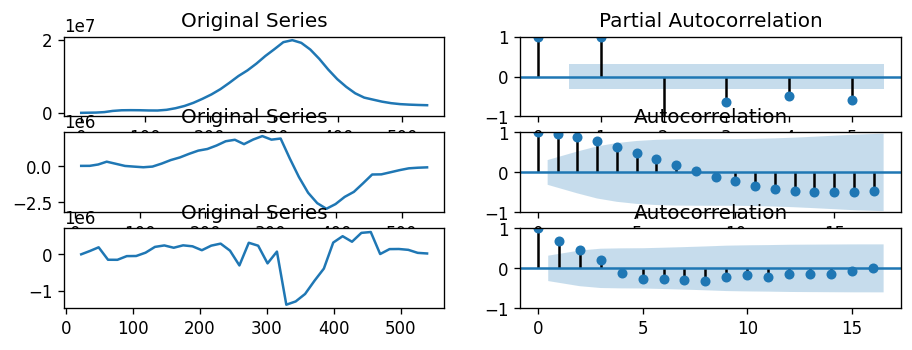

In [ ]:

cv=dataFrame[dataFrame['prename']=='Canada']['numtotal_partially']

result = adfuller(cv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(cv); axes[0, 0].set_title('Original Series')
plot_pacf(cv.values,lags=5, ax=axes[0, 1])
axes[1, 0].plot(cv.diff()); axes[1, 0].set_title('Original Series')
plot_acf(cv.values, ax=axes[1, 1])
axes[2, 0].plot(cv.diff().diff()); axes[2, 0].set_title('Original Series')
plot_acf(cv.diff().diff().dropna().values, ax=axes[2, 1])
plt.show()

ADF Statistic: -3.131657
p-value: 0.024297


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


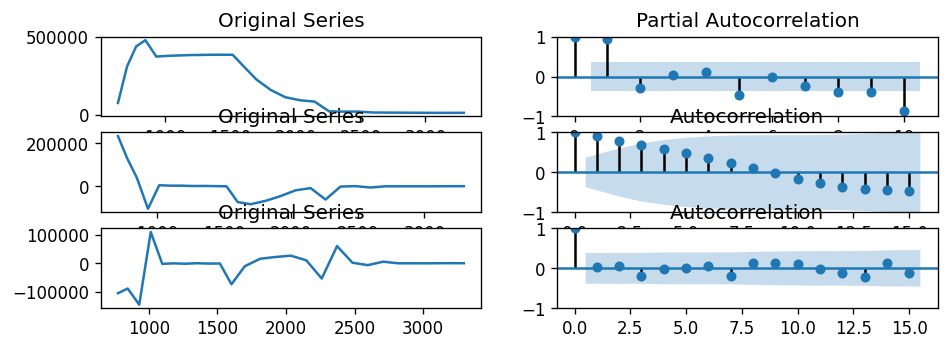

In [ ]:

cv=dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['numtotal_atleast1dose']
# plt.plot(dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['week_end'],cv.values)
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(cv); axes[0, 0].set_title('Original Series')
plot_pacf(cv.values,lags=10, ax=axes[0, 1])
axes[1, 0].plot(cv.diff()); axes[1, 0].set_title('Original Series')
plot_acf(cv.values, ax=axes[1, 1])
axes[2, 0].plot(cv.diff().diff()); axes[2, 0].set_title('Original Series')
plot_acf(cv.diff().diff().dropna().values, ax=axes[2, 1])
plt.show()

ADF Statistic: -14.060959
p-value: 0.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


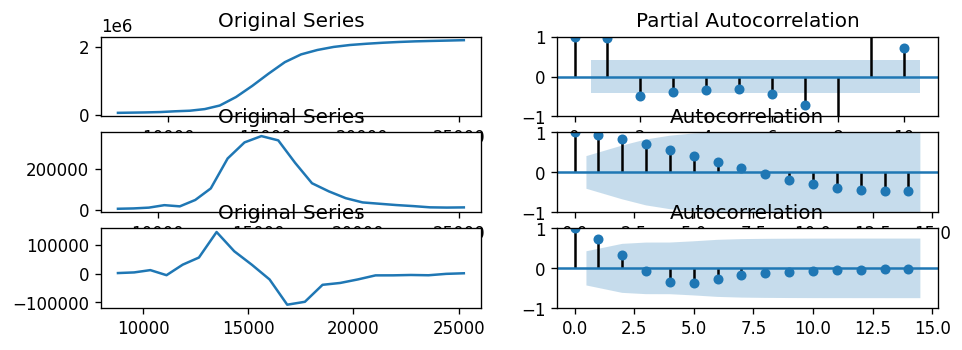

In [ ]:
cv=dataFrame3[(dataFrame3['prename']=='Canada') & (dataFrame3["age"] == '60-69') & (dataFrame3["sex"]=="f")]['numtotal_fully'].apply(lambda x:int(x))
# plt.plot(dataFrame2[(dataFrame2['prename']=='Canada') & (dataFrame2["product_name"] =="COVISHIELD")]['week_end'],cv.values)
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(cv); axes[0, 0].set_title('Original Series')
plot_pacf(cv.values,lags=10, ax=axes[0, 1])
axes[1, 0].plot(cv.diff()); axes[1, 0].set_title('Original Series')
plot_acf(cv.values, ax=axes[1, 1])
axes[2, 0].plot(cv.diff().diff()); axes[2, 0].set_title('Original Series')
plot_acf(cv.diff().diff().dropna().values, ax=axes[2, 1])
plt.show()

0         12362
10        46156
23        82512
36       212824
49       538173
63       716206
77       745591
91       727623
105      665691
119      651234
133      843004
147     1281130
161     1902260
175     2772389
189     3864994
203     5072294
217     6520540
231     8265016
245    10112143
259    11655857
273    13519160
287    15621663
301    17477501
315    19410408
Name: y, dtype: int64
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -353.532
Date:                Thu, 16 Dec 2021   AIC                            709.065
Time:                        20:57:08   BIC                            710.200
Sample:                             0   HQIC                           709.350
                                 - 24                                         
Covariance Type:                  opg    

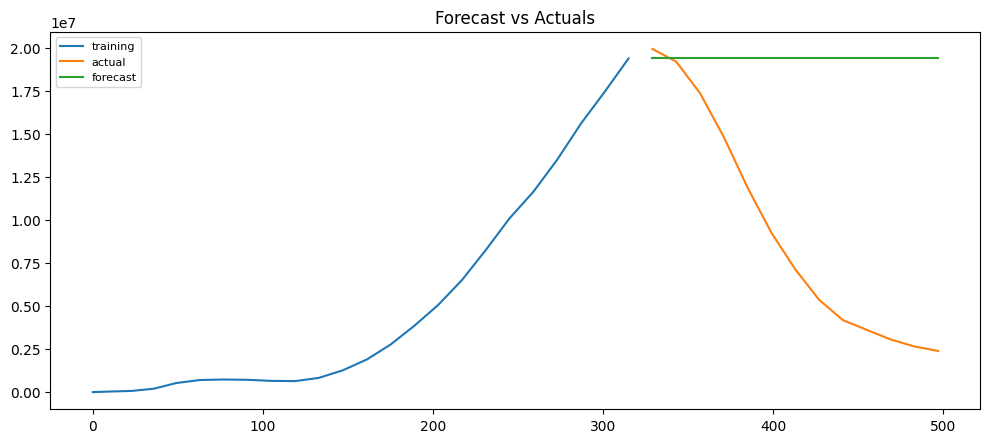

11925583.597462716


In [ ]:
train = df_numtotal_partially_train['y'].apply(lambda x:int(x))
test = df_numtotal_partially_test['y'].apply(lambda x:int(x))
print(train)
model = ARIMA(train.values, order=(0, 1, 0))  
fitted = model.fit()  
print(fitted.summary())

conf = fitted.forecast(13, alpha=0.03)  # 95% conf

# Make as pandas series
fc_series = pd.Series(conf, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(sqrt(mean_squared_error(test.to_list(), conf))
)

7395       63256
8027       68404
8797       75204
9567       85891
10337     108520
11107     125363
11877     173188
12648     276860
13488     525506
14328     851952
15168    1208956
16008    1545300
16848    1772782
17688    1901542
18528    1990896
19368    2047355
Name: y, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -183.271
Date:                Thu, 16 Dec 2021   AIC                            378.542
Time:                        20:35:31   BIC                            382.790
Sample:                             0   HQIC                           378.497
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5269      0.317      1.663      0.096      -0.094       1.148
ar.L2          0.8905      0.046     19.447      0.000       0.801       0.980
ar.L3         -0.6364      0.300     -2.121      0.0

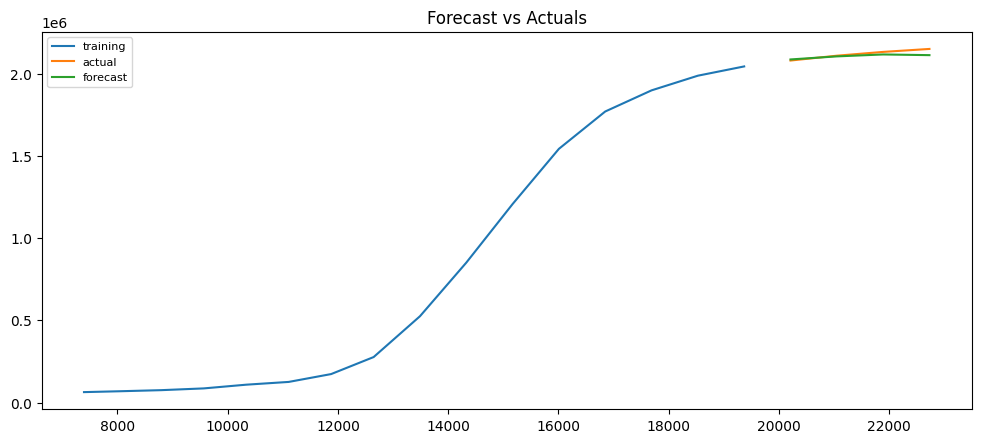

20817.794250399653


In [ ]:
train = df3_numtotal_fully_train['y'].apply(lambda x:int(x))
test = df3_numtotal_fully_test['y'].apply(lambda x:int(x))
print(train)
model = ARIMA(train.values, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

conf = fitted.forecast(4, alpha=0.04)  # 95% conf

# Make as pandas series
fc_series = pd.Series(conf, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(sqrt(mean_squared_error(test.to_list(), conf))
)



635      75900
705     309988
775     438922
846     479055
930     373614
1014    378149
1098    380721
1182    383161
1266    384101
1350    385335
1434    385633
1518    385192
1602    311024
1700    226738
1812    158466
1924    112413
2036     93230
2148     84332
2260     22015
2372     20250
Name: y, dtype: int64
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -240.343
Date:                Thu, 16 Dec 2021   AIC                            482.687
Time:                        20:47:06   BIC                            483.631
Sample:                             0   HQIC                           482.847
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z   

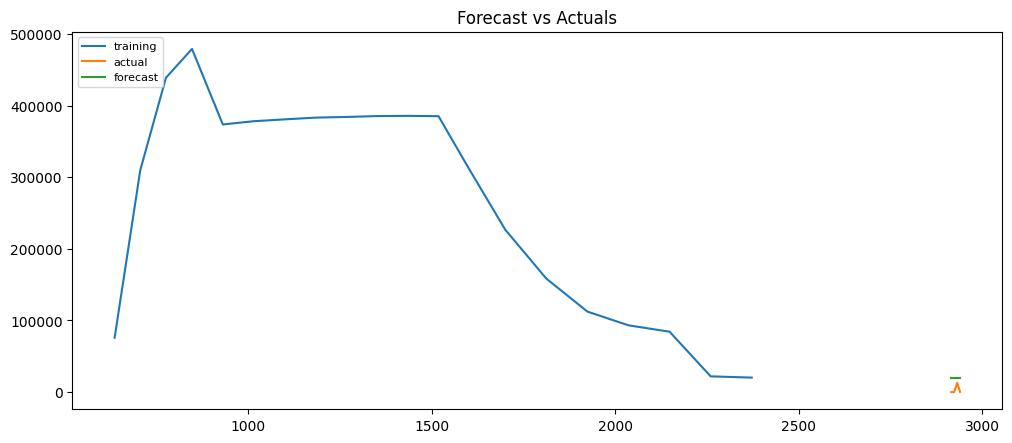

17826.22117135317


In [ ]:
train = df2_numtotal_atleast1dose_train['y'].apply(lambda x:int(x))
test = df2_numtotal_atleast1dose_test['y'].apply(lambda x:int(x))
print(train)
model = ARIMA(train.values, order=(0, 1, 0))  
fitted = model.fit()  
print(fitted.summary())

conf = fitted.forecast(4, alpha=0.04)  # 95% conf

# Make as pandas series
fc_series = pd.Series(conf, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(sqrt(mean_squared_error(test.to_list(), conf))
)

In [ ]:
from pmdarima.arima import auto_arima
arima_model =  auto_arima(df_numtotal_partially_train["y"],start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

predicted = arima_model.predict()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=350.878, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=344.185, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=342.335, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=311.309, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=312.995, Time=0.44 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=313.100, Time=0.50 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=314.995, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=311.239, Time=0.54 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=312.345, Time=0.87 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=312.687, Time=0.80 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=314.34

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,3)(0,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(1,1,3)(0,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,3)(0,1,0)[12]             : AIC=nan, Time=0.21 sec


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,3)(0,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(2,1,3)(0,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,2)(0,1,0)[12] intercept   : AIC=310.105, Time=0.25 sec
 ARIMA(1,1,2)(1,1,0)[12] intercept   : AIC=311.816, Time=0.49 sec
 ARIMA(1,1,2)(0,1,1)[12] intercept   : AIC=311.822, Time=0.62 sec
 ARIMA(1,1,2)(1,1,1)[12] intercept   : AIC=313.815, Time=0.71 sec
 ARIMA(0,1,2)(0,1,0)[12] intercept   : AIC=309.347, Time=0.13 sec
 ARIMA(0,1,2)(1,1,0)[12] intercept   : AIC=310.603, Time=0.37 sec
 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=310.548, Time=0.34 sec
 ARIMA(0,1,2)(1,1,1)[12] intercept   : AIC=312.111, Time=0.47 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,3)(0,1,0)[12] intercept   : AIC=nan, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[12] intercept   : AIC=306.708, Time=0.18 sec
 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=307.746, Time=0.45 sec
 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=308.520, Time=0.35 sec
 ARIMA(1,1,1)(1,1,1)[12] intercept   : AIC=309.653, Time=0.61 sec
 ARIMA(1,1,0)(0,1,0)[12